In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
import os

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

In [2]:

data = []
cwd = os.getcwd()
xls = pd.ExcelFile('data/xls/LSD Data BNB.xlsx')
print(xls.sheet_names)
data_xlsx = []
maincurrency = 'BNB'
tokens=['ankrBNB', 'BNBx', 'STKBNB']
for sheet in tokens + [maincurrency]:
    _df = xls.parse(sheet)
    _df.dropna(subset=['Date'], inplace=True)
    _df['Date']=pd.to_datetime(_df['Date'])
    _df=_df.set_index('Date')
    _df.columns = _df.columns.str.lower()
    _df.token = sheet
    data_xlsx.append(_df)

['Sheet7', 'Sheet6', 'BNB', 'ankrBNB', 'BNBx', 'STKBNB', 'RBNB']


In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#plt.style.use('uzh')
plt.rcParams["font.family"] = "serif"
#plt.rcParams['text.usetex'] = False

def add_terra_and_ftx(ax, which= 'both'):
    if which in ['terra', 'both']:
        terra = ax.axvline(dt.datetime(2022, 5, 7), 0,0.8, color='k', lw = 0.5)
        trans = ax.transData.transform(terra.get_xydata())
        trans = ax.transAxes.inverted().transform(trans)
        terra_text = ax.text(trans[1][0]+0.01,0.05,
                s='Terra Collapse',fontsize = 'xx-small',
                rotation=90, transform=ax.transAxes)
        
    if which in ['ftx', 'both']:
        ftx = ax.axvline(dt.datetime(2022, 11, 2), 0,0.8, color='k', lw = 0.5)
        trans = ax.transData.transform(ftx.get_xydata())
        trans = ax.transAxes.inverted().transform(trans)
        terra_text = ax.text(trans[1][0]+0.01,0.05,
                s='FTX Collapse',fontsize = 'xx-small',
                rotation=90, transform=ax.transAxes)

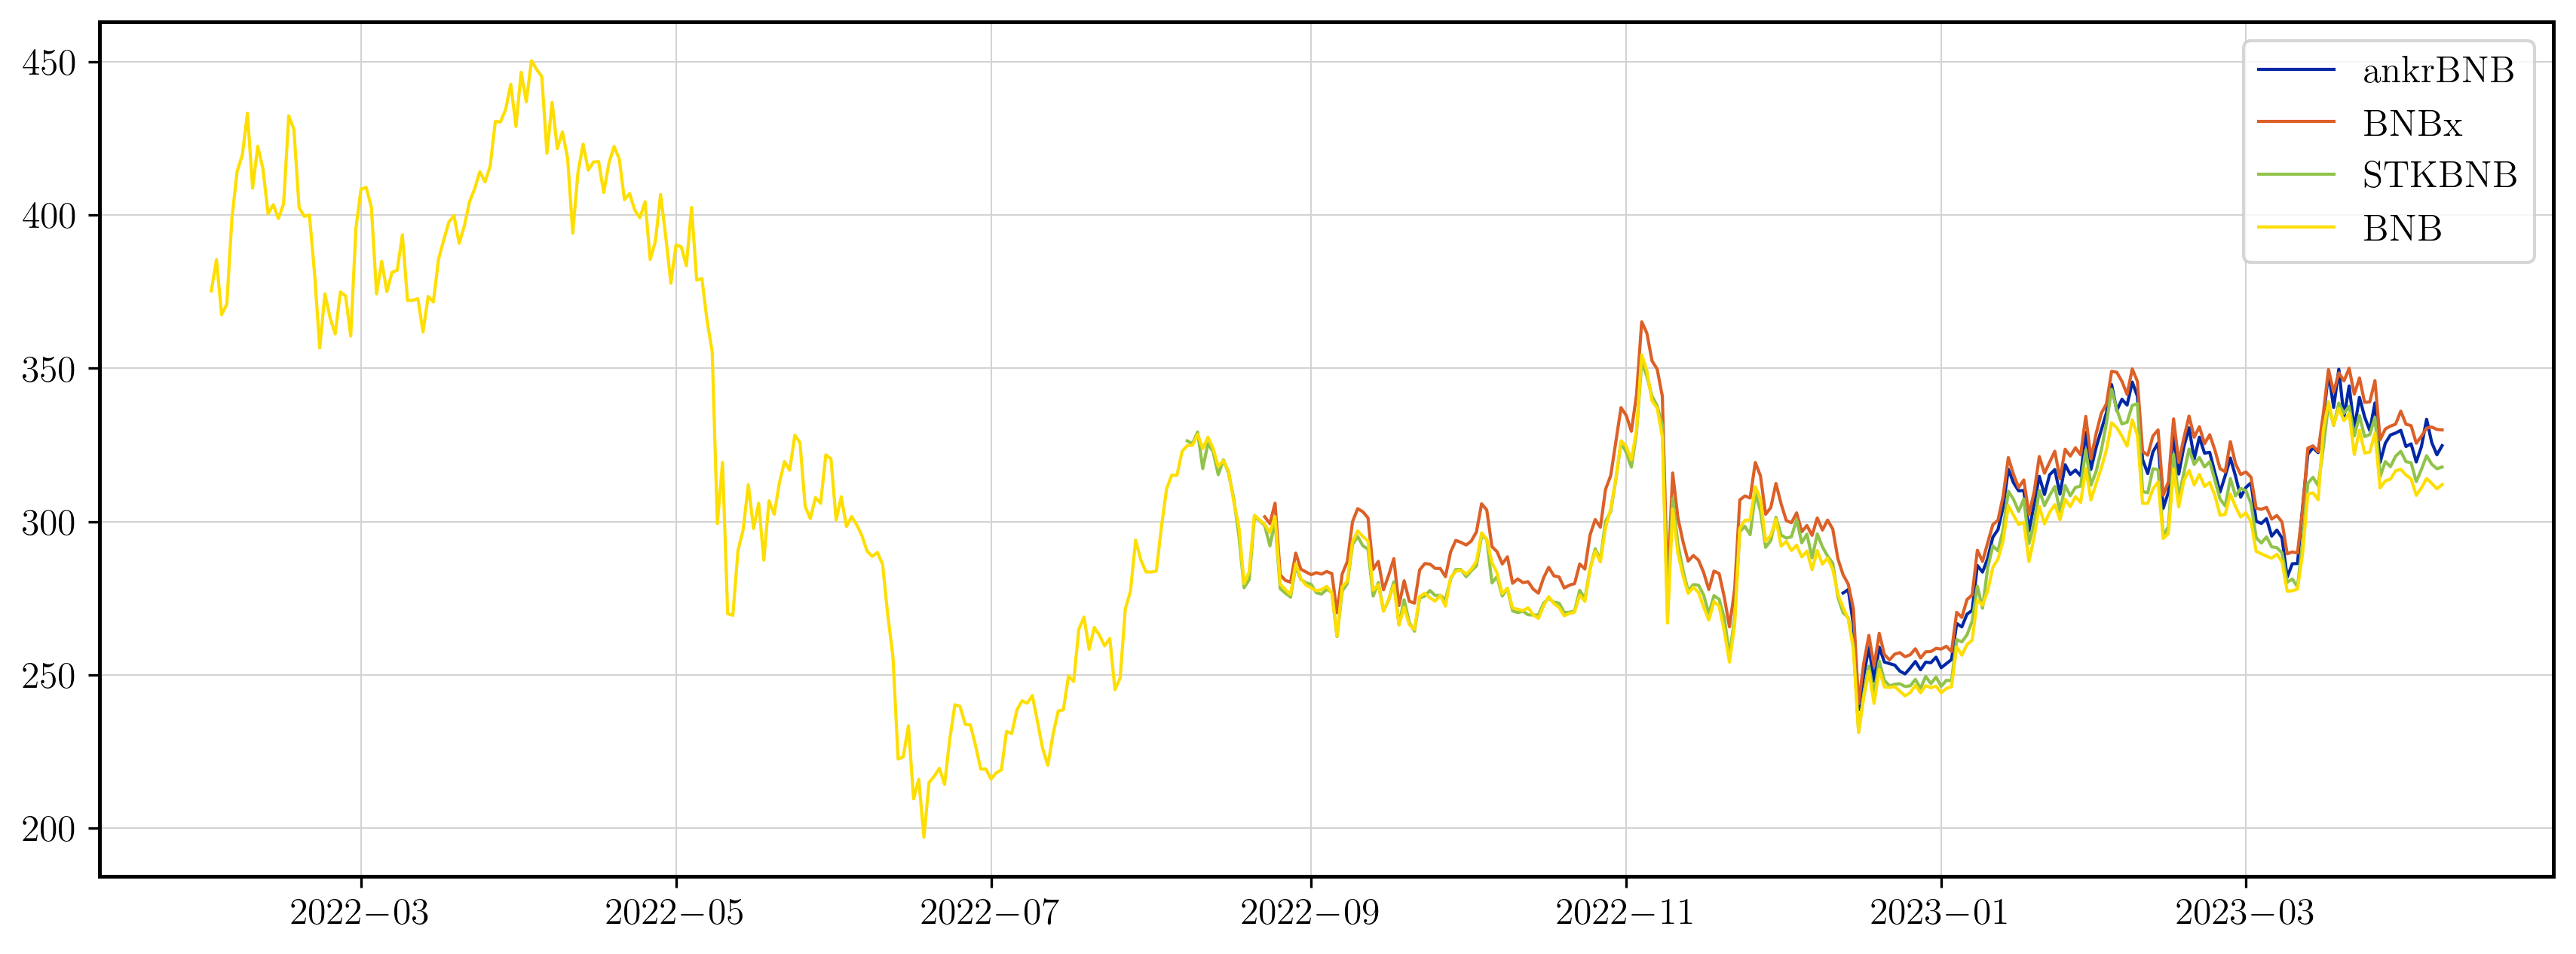

In [35]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for cur in data_xlsx:
    ax.plot(cur.index, cur.close, lw=1, label = cur.token)

ax.set_axisbelow(True)
#ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
#ax.set_ylim(1,1.1)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [62]:



result = pd.concat([d.close for d in data_xlsx], axis=1, join="outer", keys= [d.token for d in data_xlsx])
#interest = result[[maincurrency]].copy()
#interest['daily']= 0.07 
#interest.drop([maincurrency],inplace=True, axis=1)


result = result.div(result[maincurrency].values,axis=0)
result = result.drop(maincurrency, axis=1)
result.dropna(axis = 0, how = 'all', inplace = True)

interest = result.copy()
interest['daily']= 0.03

interest = pd.DataFrame(interest['daily'])

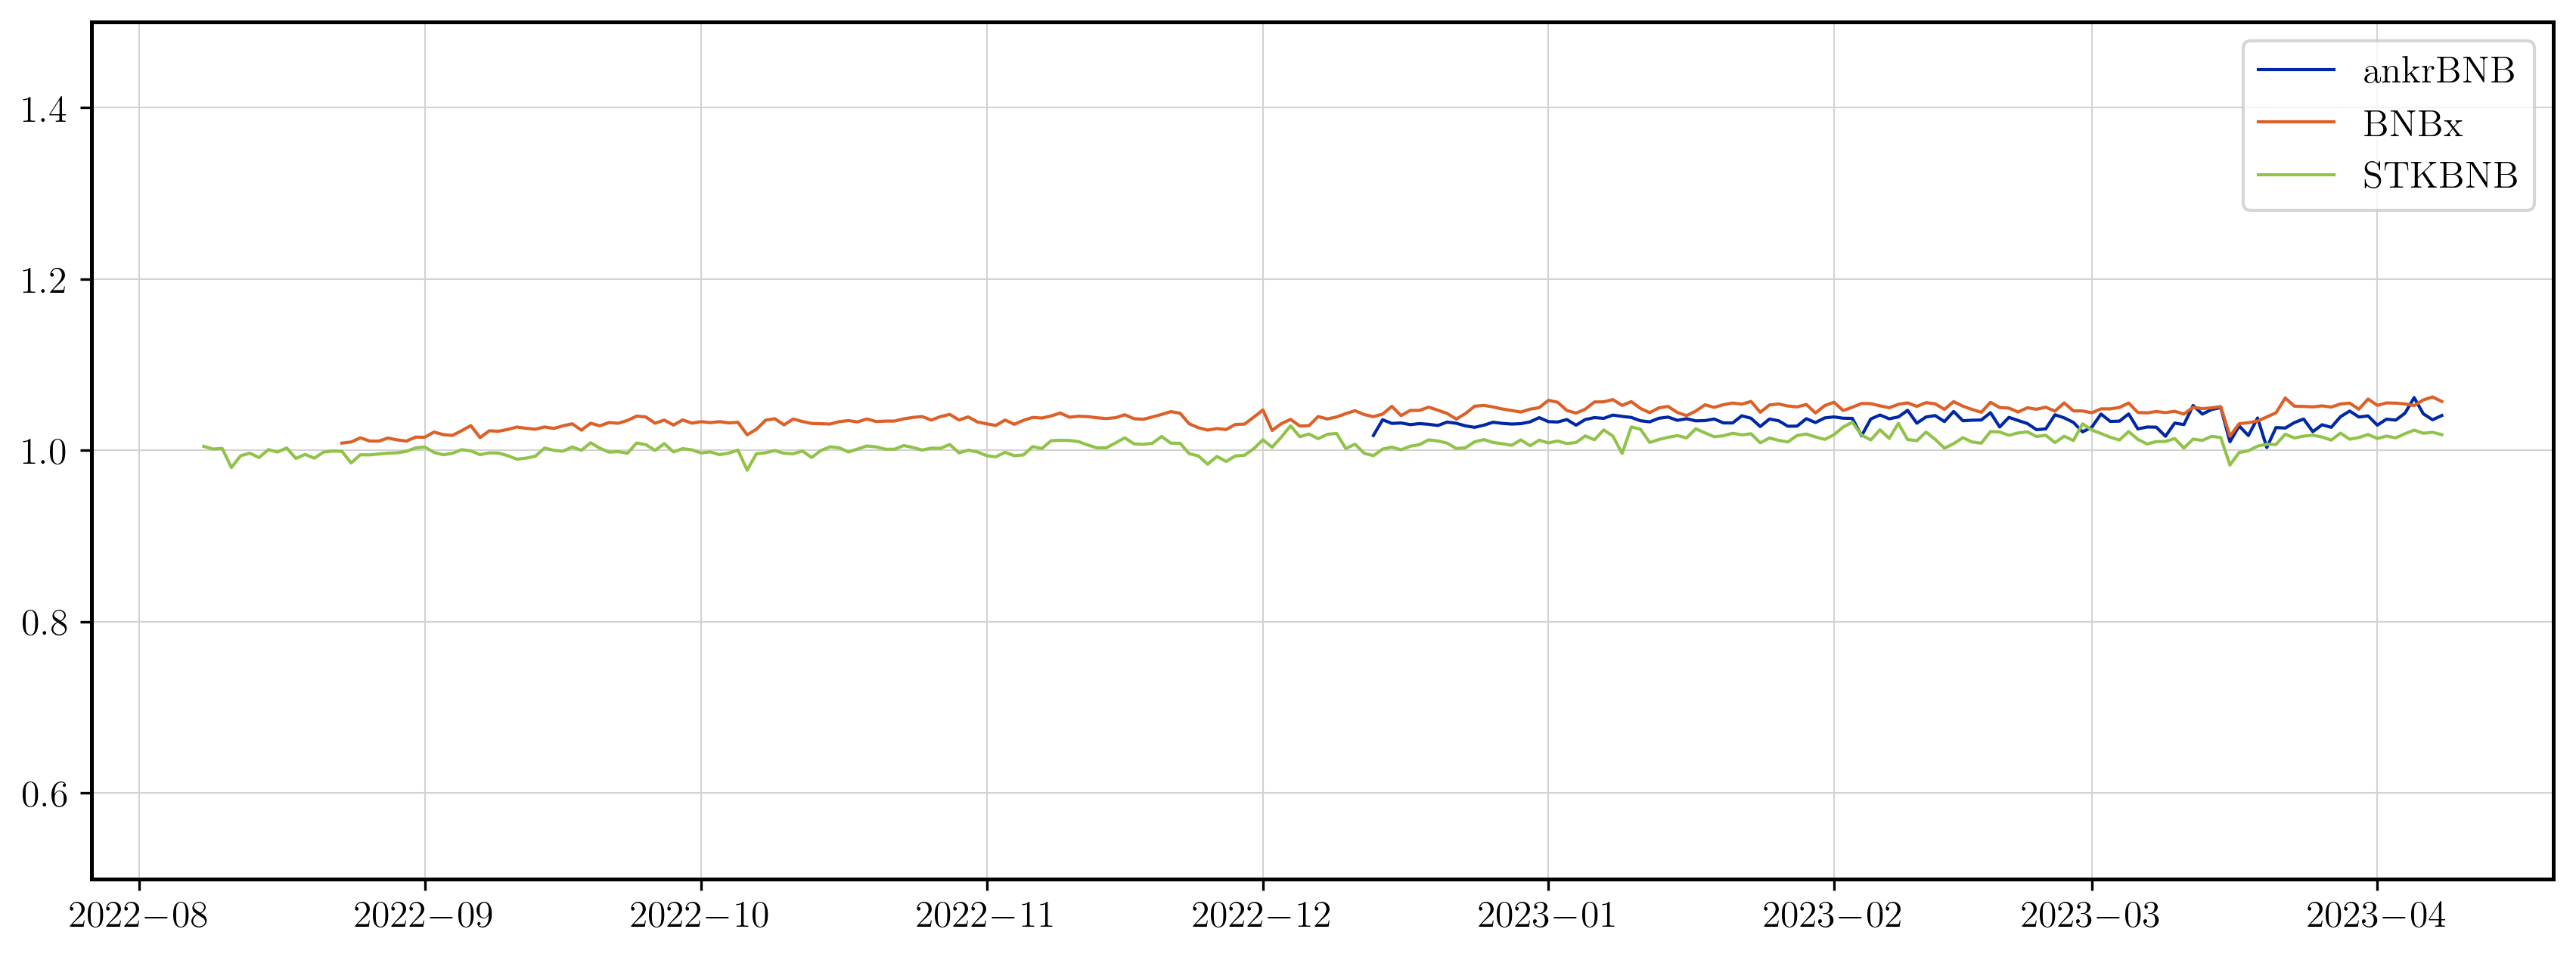

In [63]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in result.columns:
    ax.plot(result.index, result[col], lw=1, label = col)

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
ax.set_ylim(0.5,1.5)
fig.set_facecolor('w')

plt.show()

In [64]:
interest['daily']=(1+np.array(interest['daily']))**(1/365)
interest['daily_accrued']= interest['daily'].cumprod()

#interest['daily_eth_change']=interest['adj close'].pct_change(1)
#interest['daily_accrued_eth']= (1+interest['daily_eth_change']).cumprod()
#interest['monthly_ETH_std'] = interest['daily_eth_change'].rolling(30).std()

print(interest)

               daily  daily_accrued
Date                               
2022-08-08  1.000081       1.000081
2022-08-09  1.000081       1.000162
2022-08-10  1.000081       1.000243
2022-08-11  1.000081       1.000324
2022-08-12  1.000081       1.000405
...              ...            ...
2023-04-04  1.000081       1.019626
2023-04-05  1.000081       1.019709
2023-04-06  1.000081       1.019791
2023-04-07  1.000081       1.019874
2023-04-08  1.000081       1.019956

[244 rows x 2 columns]


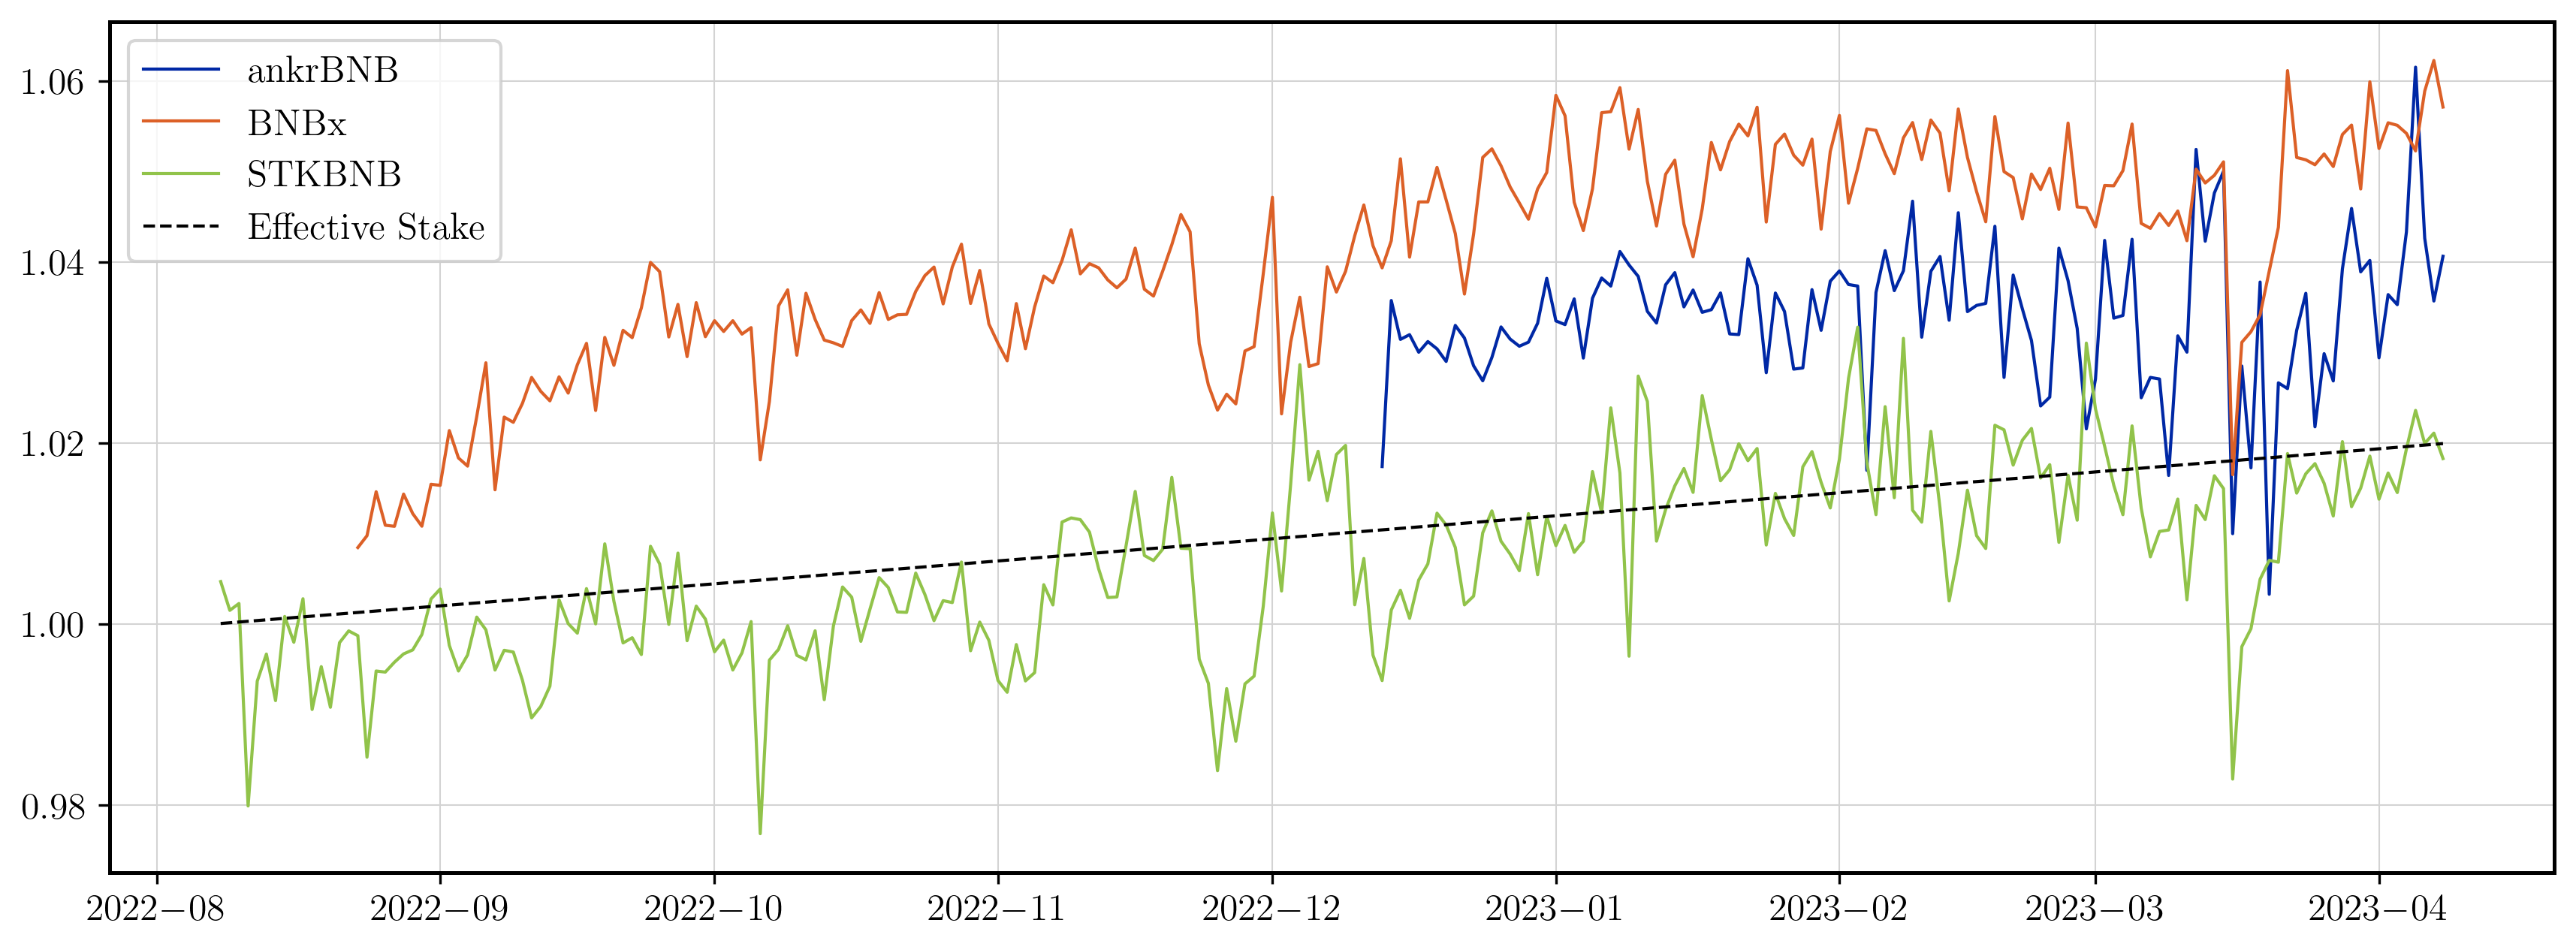

In [65]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in result.columns:
    ax.plot(result.index, result[col], lw=1, label = col)

ax.plot(result.index, interest['daily_accrued'], color='k', lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [66]:
result_with_interest = pd.concat([result, interest.daily], axis=1, join="outer")
#result_with_interest.dropna(subset=['wstETH'], inplace=True)
result_with_interest['daily_accrued']= result_with_interest['daily'].cumprod()

In [67]:
result_with_interest

ankrBNB      BNBx    STKBNB     daily  daily_accrued
Date                                                             
2022-08-08       NaN       NaN  1.004712  1.000081       1.000081
2022-08-09       NaN       NaN  1.001531  1.000081       1.000162
2022-08-10       NaN       NaN  1.002287  1.000081       1.000243
2022-08-11       NaN       NaN  0.979926  1.000081       1.000324
2022-08-12       NaN       NaN  0.993712  1.000081       1.000405
...              ...       ...       ...       ...            ...
2023-04-04  1.043331  1.054219  1.019368  1.000081       1.019626
2023-04-05  1.061530  1.052279  1.023620  1.000081       1.019709
2023-04-06  1.042636  1.058886  1.019967  1.000081       1.019791
2023-04-07  1.035703  1.062270  1.021106  1.000081       1.019874
2023-04-08  1.040643  1.057128  1.018297  1.000081       1.019956

[244 rows x 5 columns]

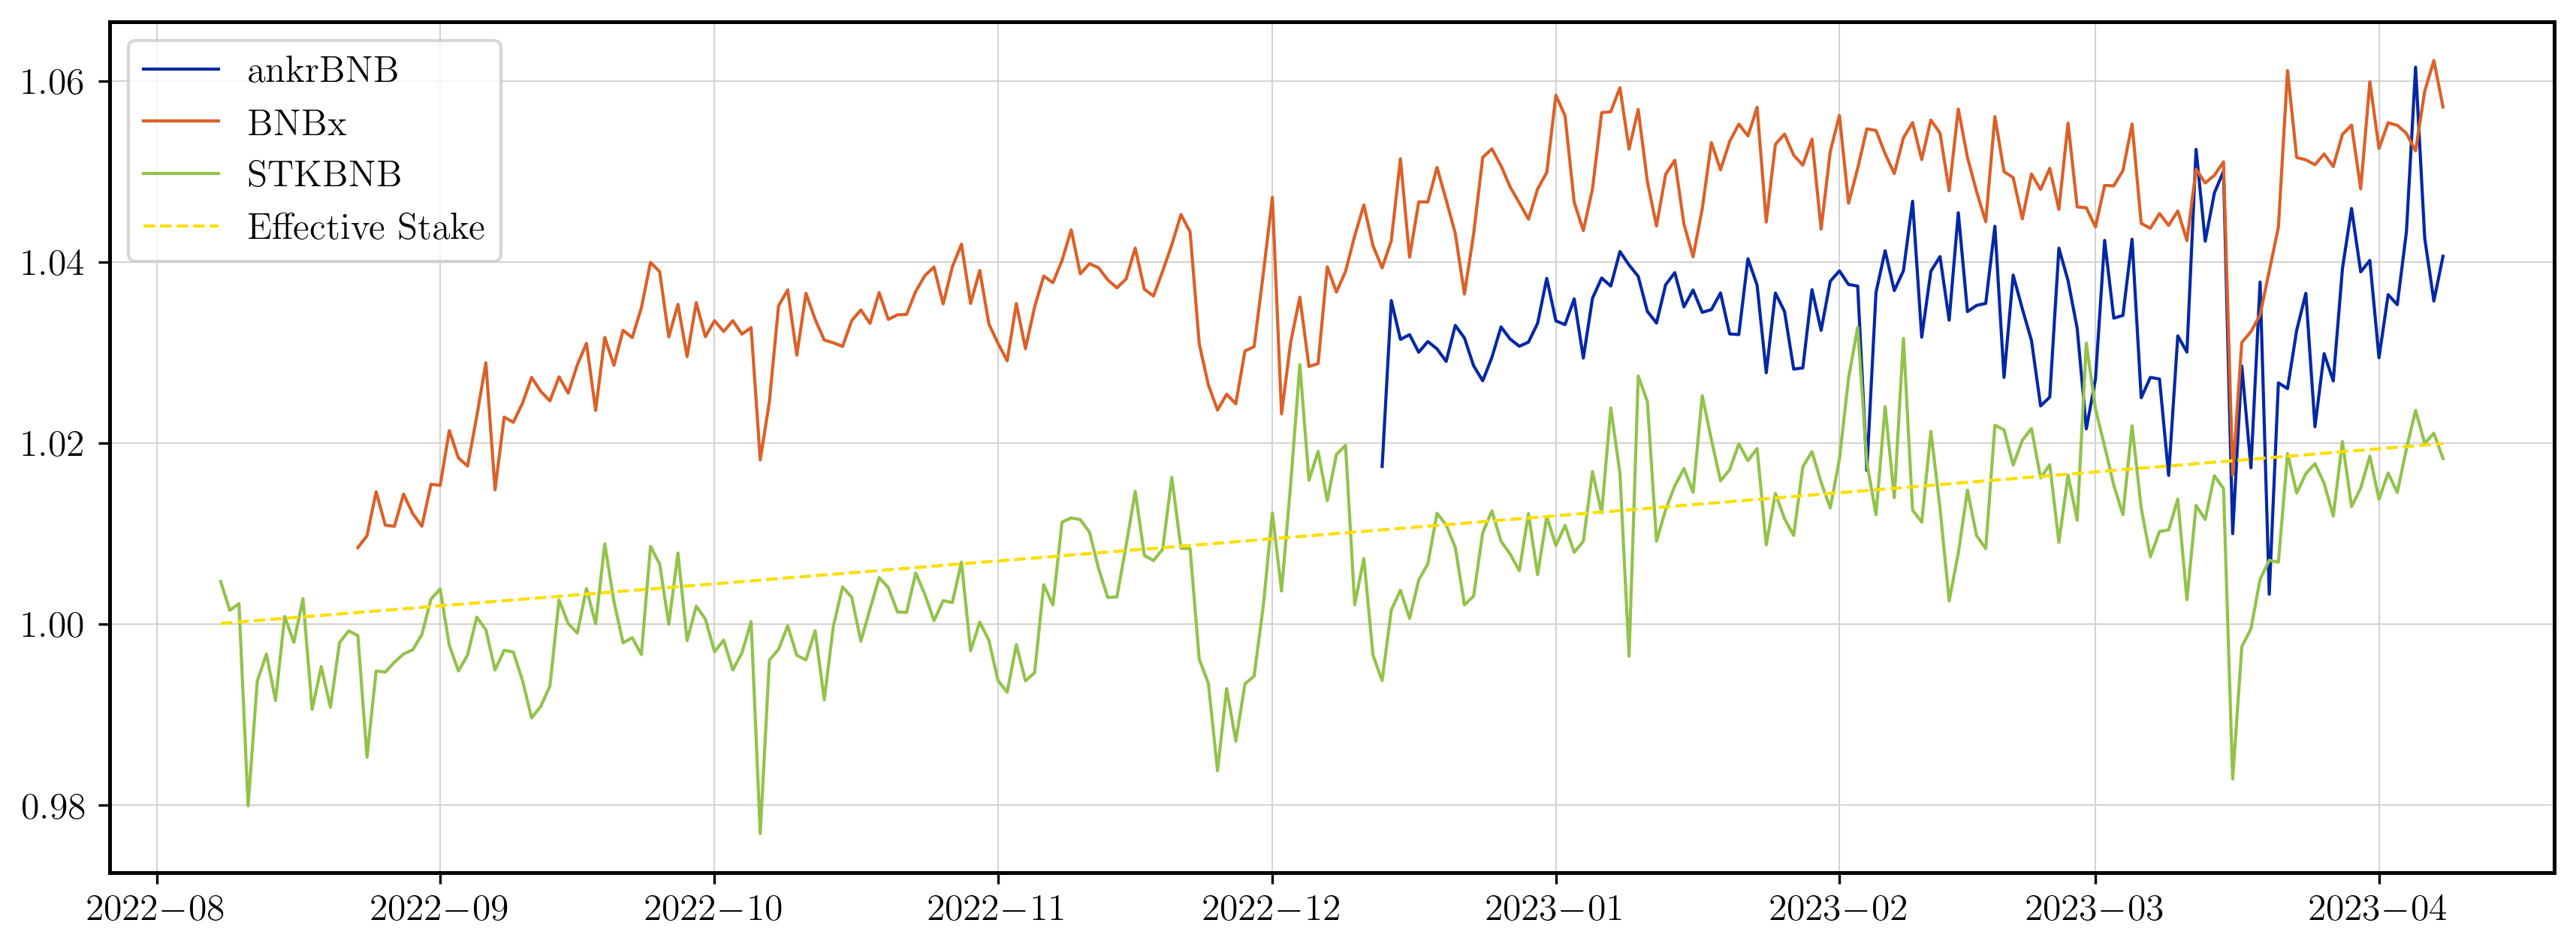

In [69]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot.index, data_to_plot[col].rolling(window=1).mean(), lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

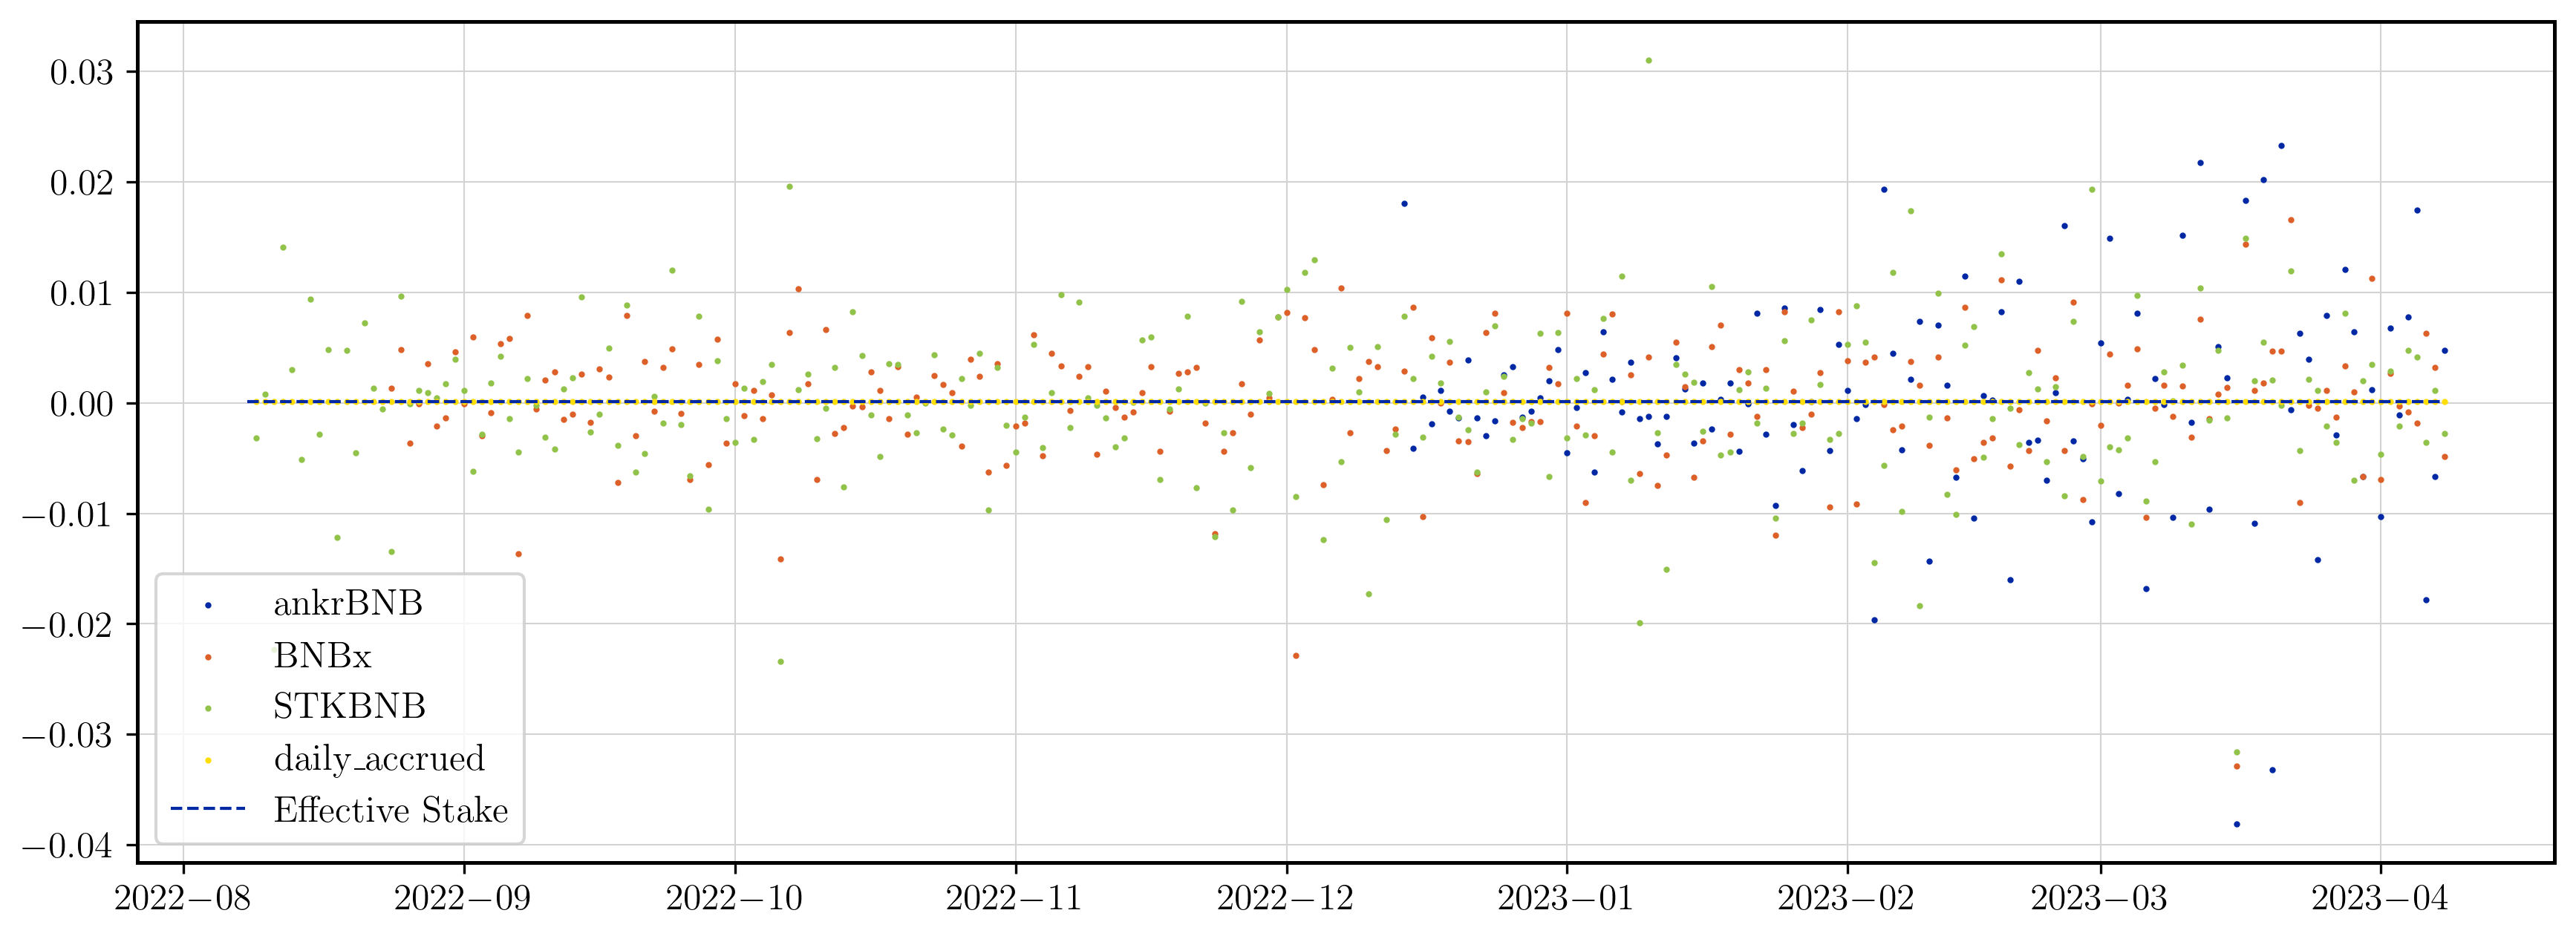

In [70]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col == 'daily':
        continue
    ax.scatter(data_to_plot.index, data_to_plot[col].pct_change(1), s=1,lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily']-1, lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [71]:
data_to_plot.pct_change(1).describe()

ankrBNB        BNBx      STKBNB  daily  daily_accrued
count  116.000000  228.000000  243.000000  243.0     243.000000
mean     0.000240    0.000222    0.000082    0.0       0.000081
std      0.009505    0.005611    0.007324    0.0       0.000000
min     -0.038124   -0.032877   -0.031614    0.0       0.000081
25%     -0.003658   -0.002370   -0.003591    0.0       0.000081
50%      0.000171    0.000479    0.000063    0.0       0.000081
75%      0.004880    0.003497    0.004210    0.0       0.000081
max      0.023277    0.016580    0.031051    0.0       0.000081

In [72]:
#df[df['A'].isnull()].index.tolist()

In [84]:
interest_band = result.copy()
interest_band['daily_upper']= 0.05 
interest_band['daily_lower']= 0.01

interest_band['daily_upper']=(1+np.array(interest_band['daily_upper']))**(1/365)
interest_band['daily_accrued_upper']= interest_band['daily_upper'].cumprod()

interest_band['daily_lower']=(1+np.array(interest_band['daily_lower']))**(1/365)
interest_band['daily_accrued_lower']= interest_band['daily_lower'].cumprod()

In [85]:
_df = result_with_interest.copy()
adjusted_results = result_with_interest.copy()
for col in tokens:
    adjusted_results[col]= (adjusted_results[col]/_df.loc[(min(_df[_df[col].notnull()].index.tolist()))][col])*_df.loc[(min(_df[_df[col].notnull()].index.tolist()))]['daily_accrued']


    

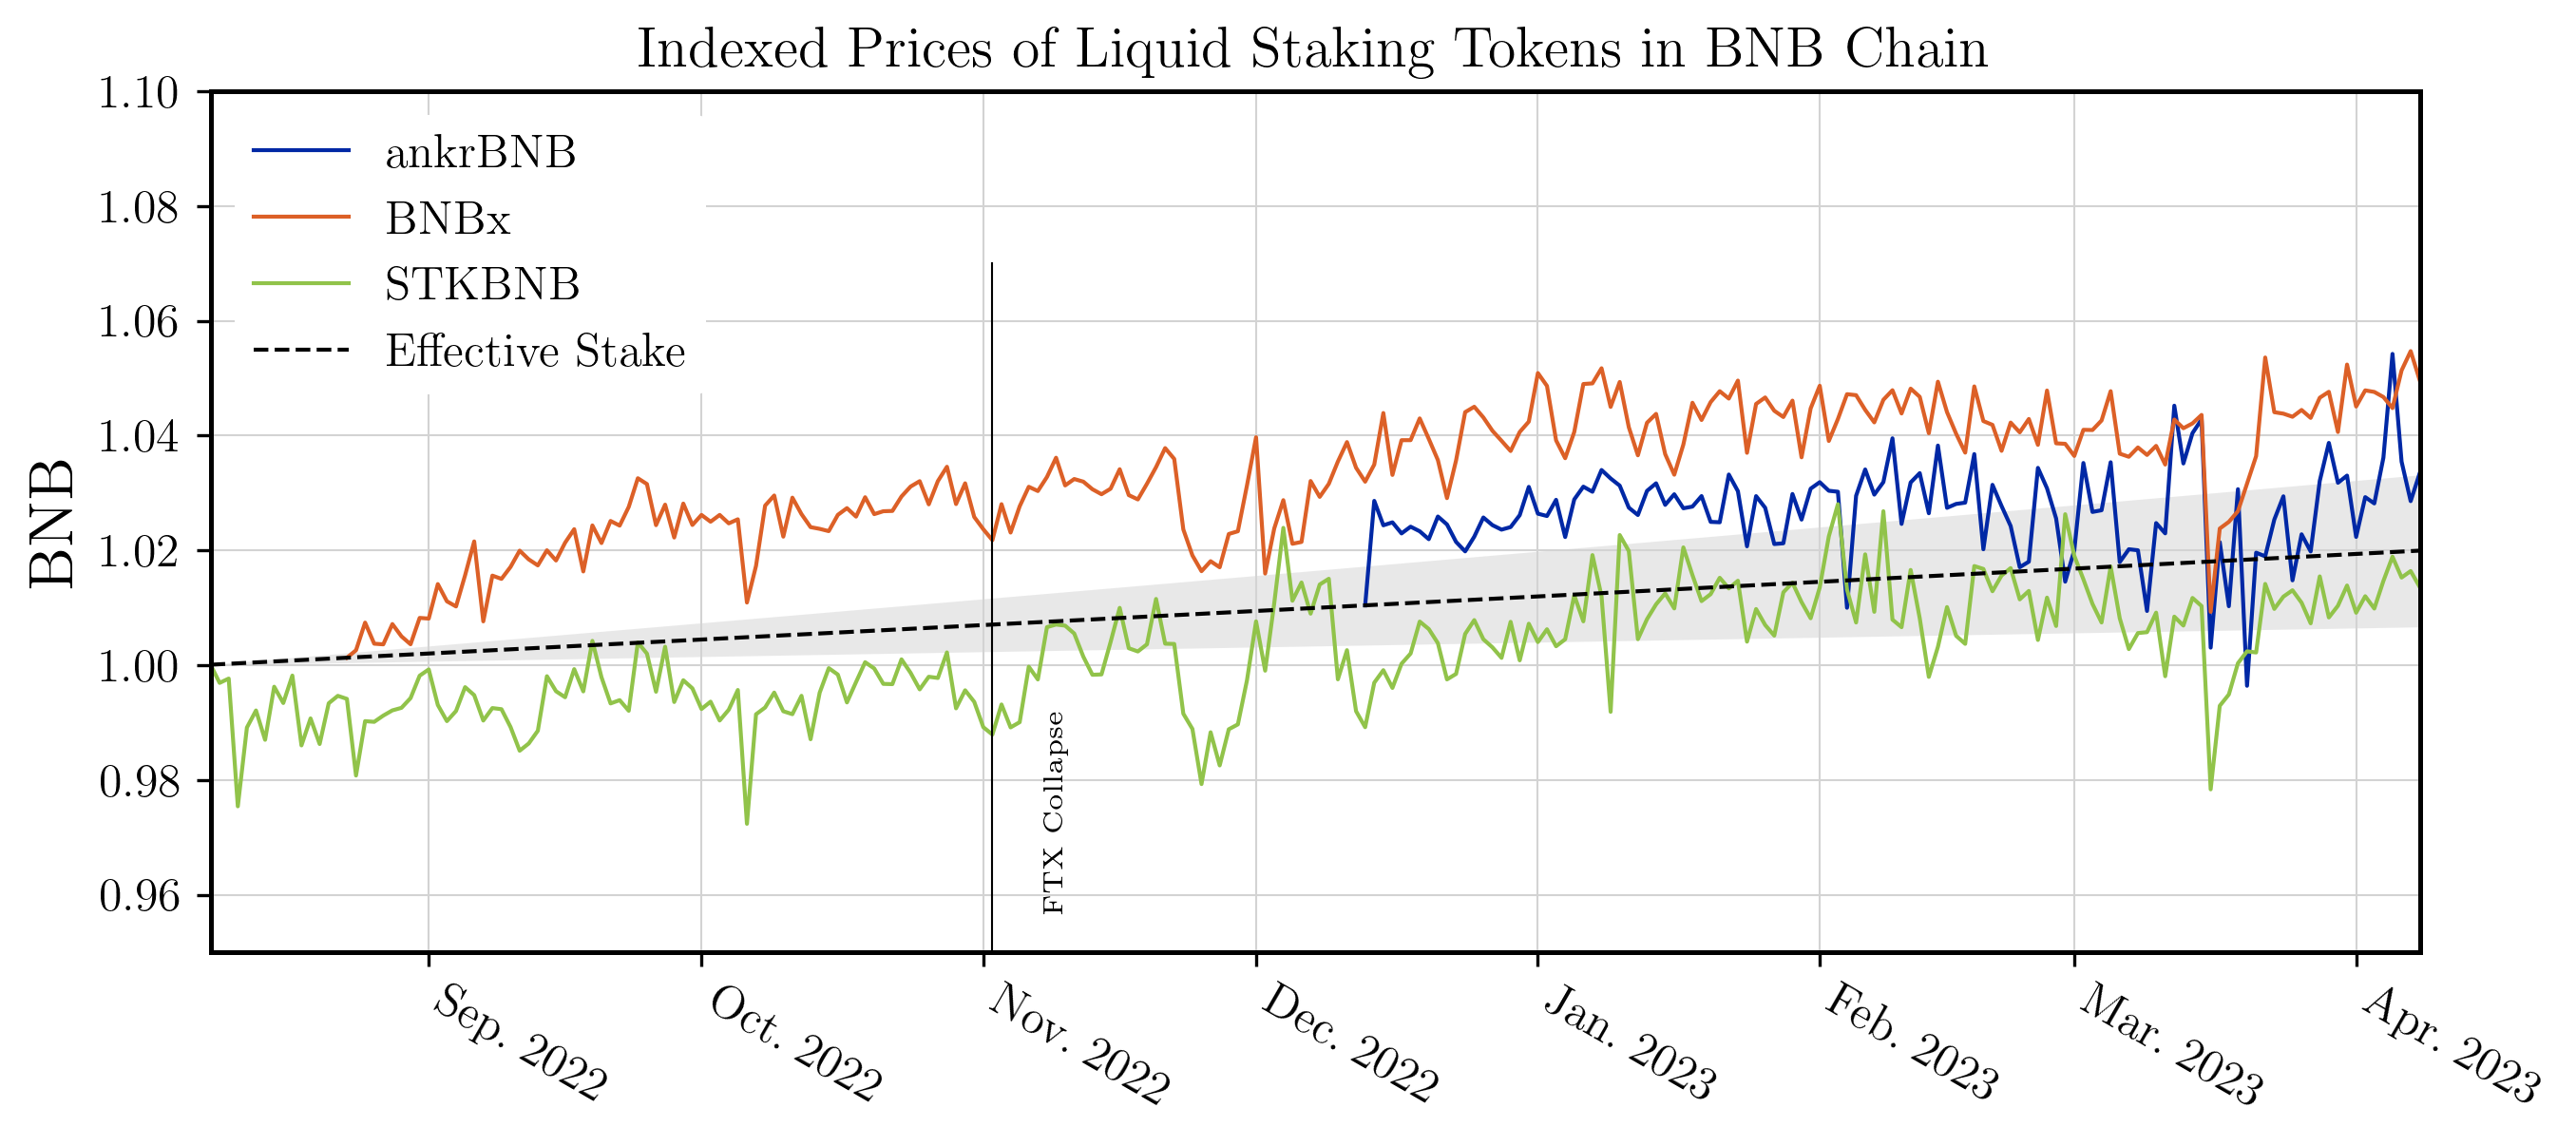

In [92]:
data_to_plot = adjusted_results
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,4),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot.index, data_to_plot[col], lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], color = 'k', lw=1, ls='--', label='Effective Stake')
ax.fill_between(interest_band.index, interest_band['daily_accrued_lower'], interest_band['daily_accrued_upper'], color = 'lightgray', alpha = 0.5, lw=0)

add_terra_and_ftx(ax, 'ftx')

ax.set_title('Indexed Prices of Liquid Staking Tokens in BNB Chain')
ax.set_ylabel('BNB')

leg = ax.legend(frameon=True,facecolor='white', framealpha=1)
frame = leg.get_frame()
frame.set_linewidth(0)

# Text in the x-axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b. %Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=-30, horizontalalignment='left')


#ax.set_ylim(0.6,1.2)
ax.set_xlim(min(data_to_plot.index),max(data_to_plot.index))
ax.set_ylim(0.95, 1.1)
ax.set_axisbelow(True)
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [121]:
df1 =  adjusted_results



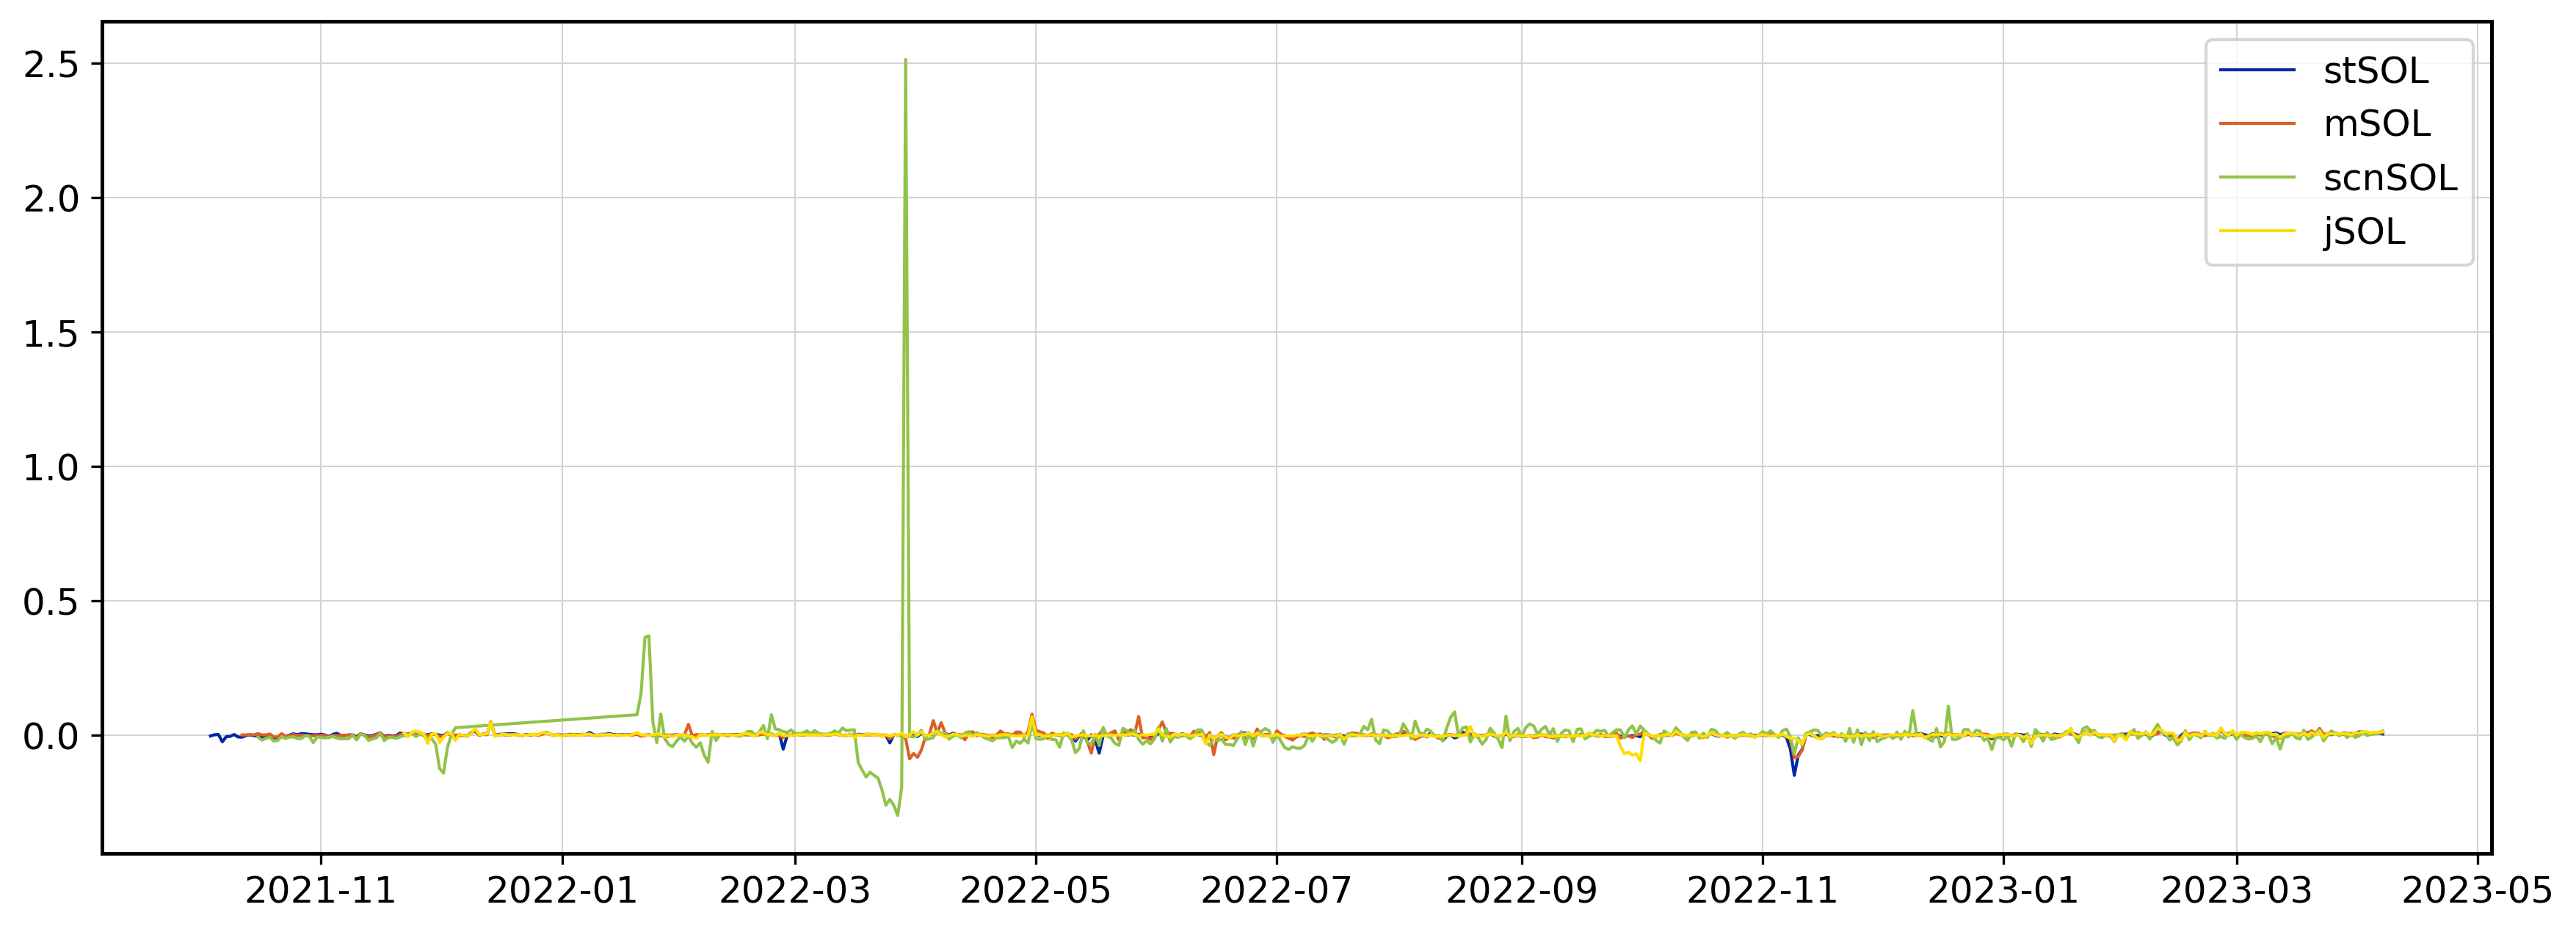

In [122]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = adjusted_results
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot[data_to_plot[col].notnull()].index, signal.detrend(data_to_plot[data_to_plot[col].notnull()][col].values), lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [123]:
data_to_plot[data_to_plot[col].notnull()][col].values

array([1.00018538, 1.0003708 , 1.00055625, 1.00074174, 1.00092726,
       1.00111282, 1.00129841, 1.00148403, 1.00166969, 1.00185538,
       1.00204111, 1.00222687, 1.00241267, 1.0025985 , 1.00278436,
       1.00297026, 1.0031562 , 1.00334216, 1.00352817, 1.0037142 ,
       1.00390028, 1.00408638, 1.00427252, 1.0044587 , 1.00464491,
       1.00483115, 1.00501743, 1.00520375, 1.00539009, 1.00557648,
       1.00576289, 1.00594934, 1.00613583, 1.00632235, 1.00650891,
       1.0066955 , 1.00688212, 1.00706878, 1.00725547, 1.0074422 ,
       1.00762897, 1.00781576, 1.0080026 , 1.00818946, 1.00837636,
       1.0085633 , 1.00875027, 1.00893728, 1.00912432, 1.00931139,
       1.0094985 , 1.00968565, 1.00987282, 1.01006004, 1.01024729,
       1.01043457, 1.01062189, 1.01080924, 1.01099663, 1.01118405,
       1.01137151, 1.011559  , 1.01174652, 1.01193408, 1.01212168,
       1.01230931, 1.01249698, 1.01268468, 1.01287241, 1.01306018,
       1.01324798, 1.01343582, 1.0136237 , 1.01381161, 1.01399

In [124]:
adjusted_results 

stSOL      mSOL    scnSOL      jSOL     daily  daily_accrued
Date                                                                       
2021-10-04  1.000185       NaN       NaN       NaN  1.000185       1.000185
2021-10-05  1.004680       NaN       NaN       NaN  1.000185       1.000371
2021-10-06  1.005909       NaN       NaN       NaN  1.000185       1.000556
2021-10-07  0.978814       NaN       NaN       NaN  1.000185       1.000742
2021-10-08  0.998368       NaN       NaN       NaN  1.000185       1.000927
...              ...       ...       ...       ...       ...            ...
2023-04-03  1.102217  1.097538  1.096505  1.099502  1.000185       1.106714
2023-04-04  1.097968  1.095922  1.101618  1.094150  1.000185       1.106919
2023-04-05  1.101729  1.099319  1.103553  1.098171  1.000185       1.107124
2023-04-06  1.102714  1.097930  1.107709  1.098734  1.000185       1.107330
2023-04-07  1.099732  1.098757  1.114458  1.100382  1.000185       1.107535

[551 rows x 6 columns]

In [128]:
_df = adjusted_results.copy()
excess_returns = adjusted_results.copy()
excess_returns['daily']=_df['daily']-1
for col in tokens:
    excess_returns[col] = _df[col].pct_change(1)

for col in tokens:
    excess_returns[col] =  excess_returns[excess_returns[col].notna()][col]-excess_returns['daily']



    

/Users/bekra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: TheSans


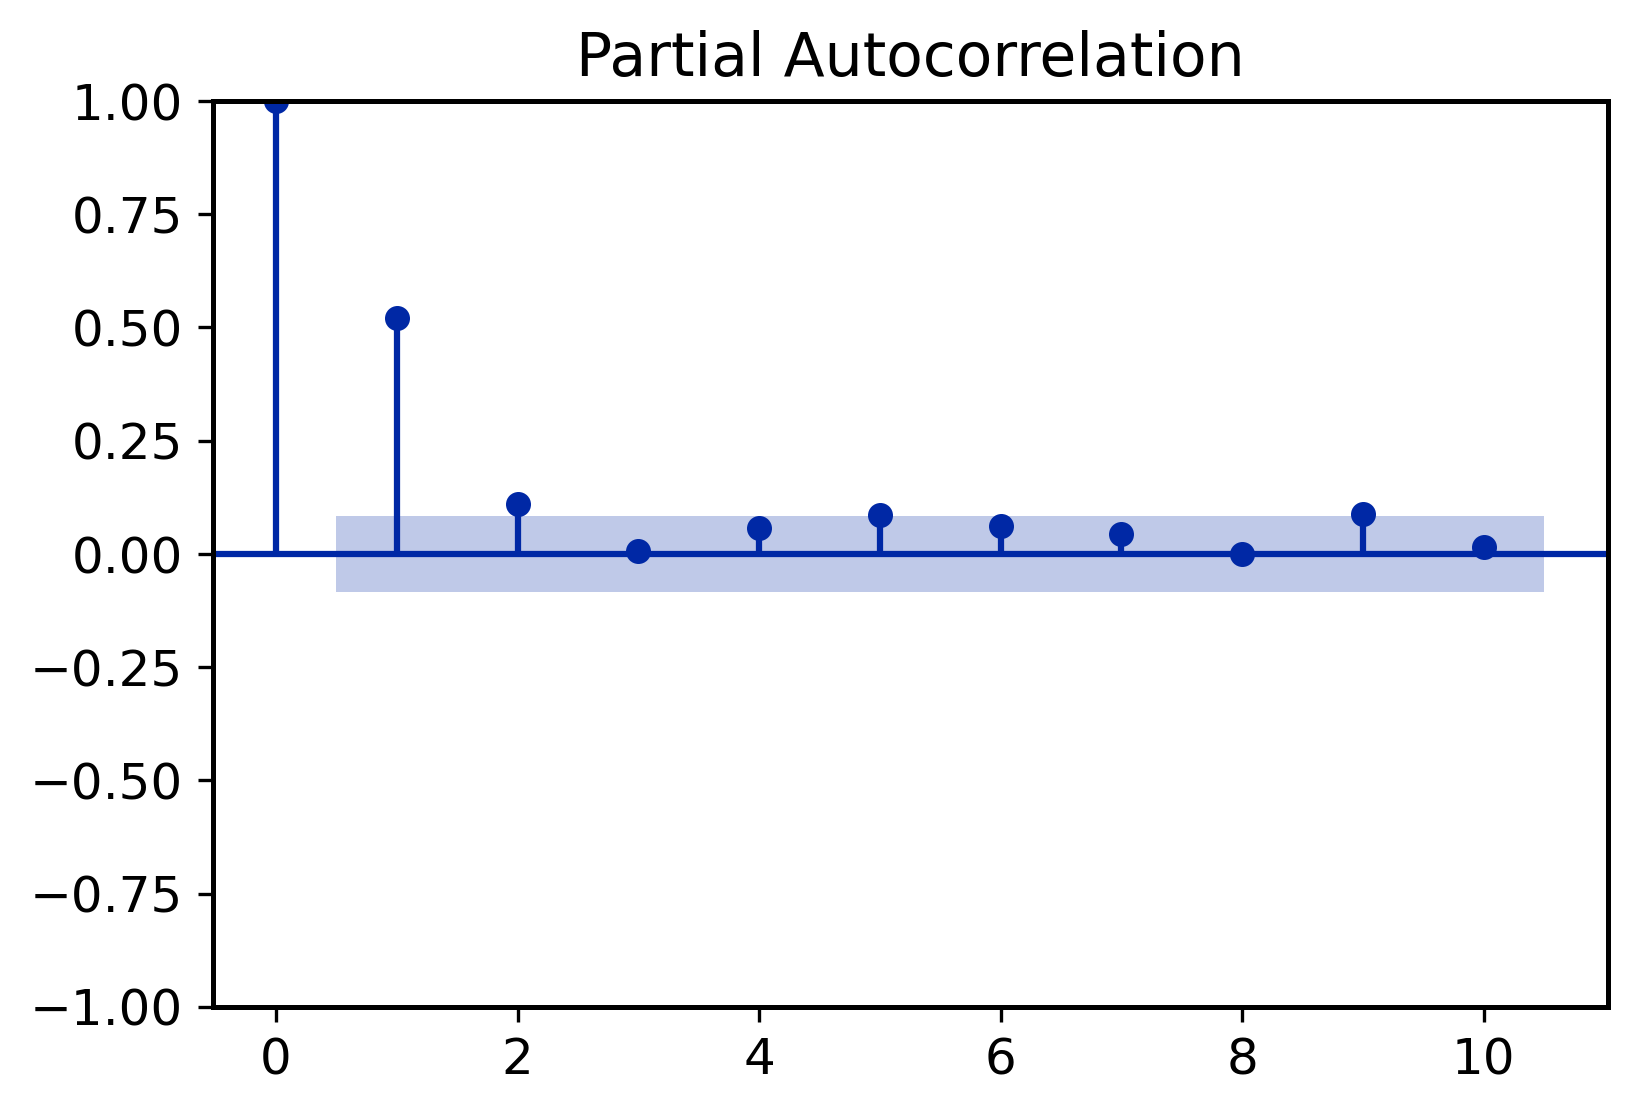

/Users/bekra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


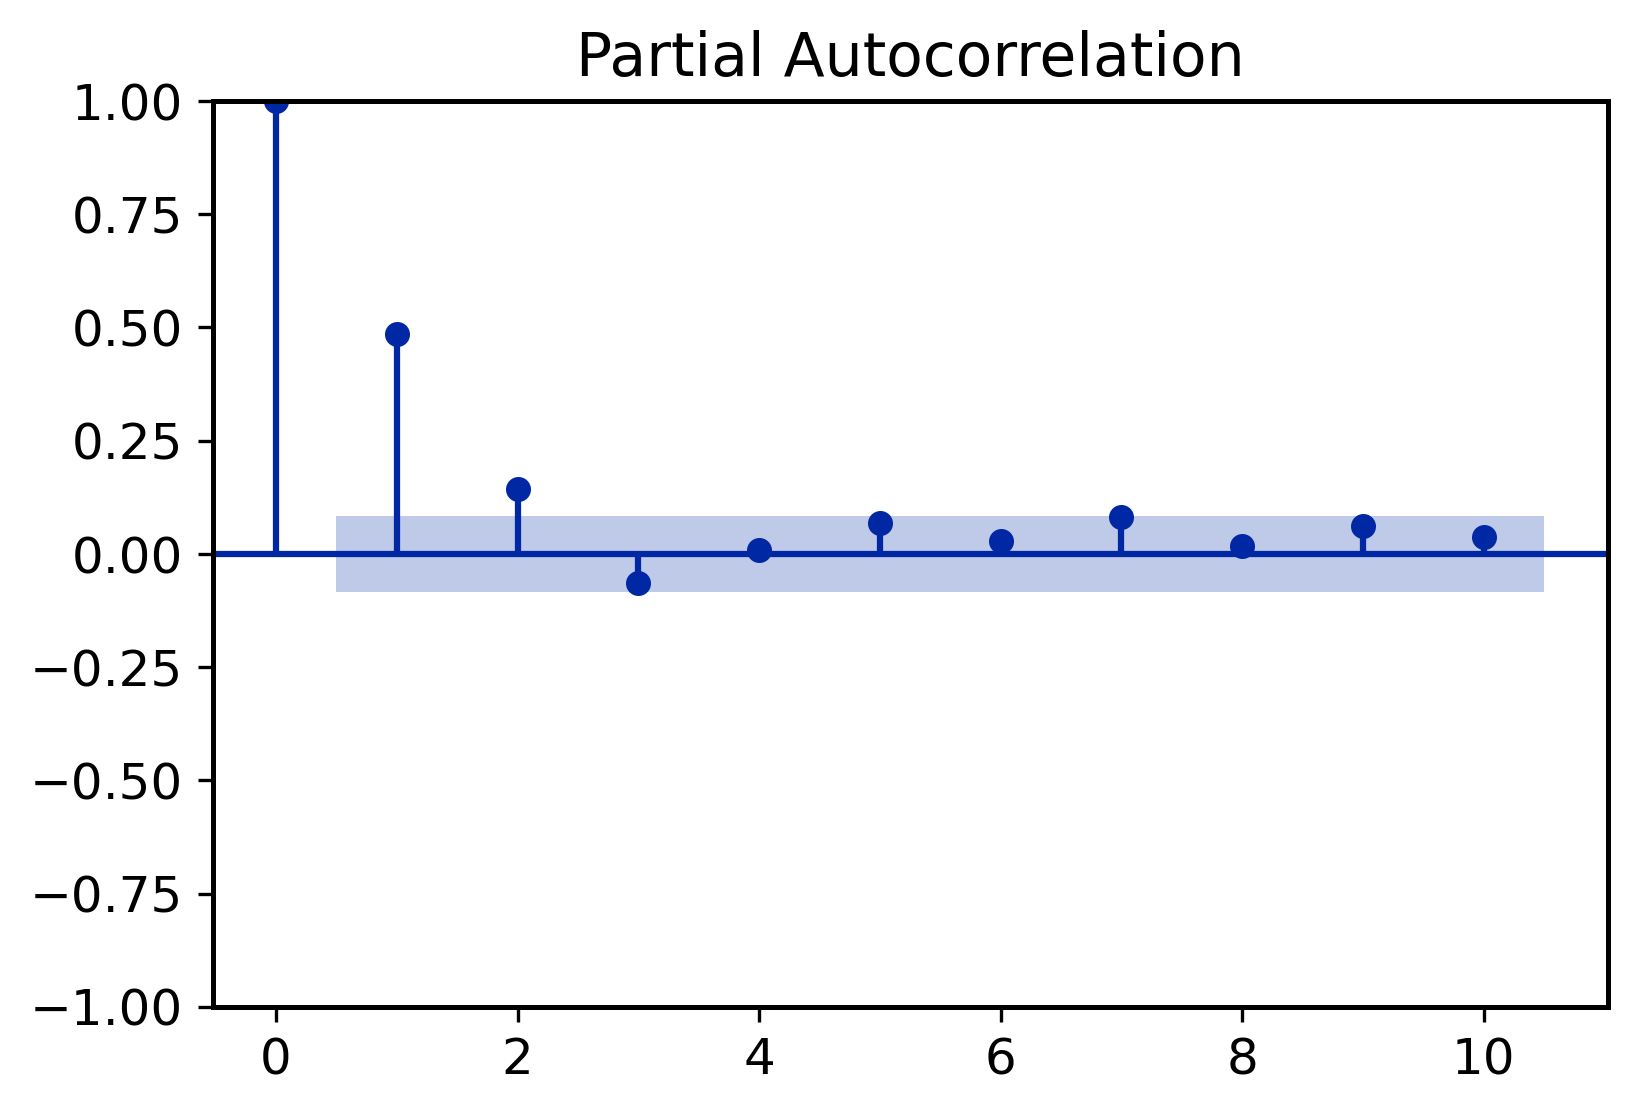

/Users/bekra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


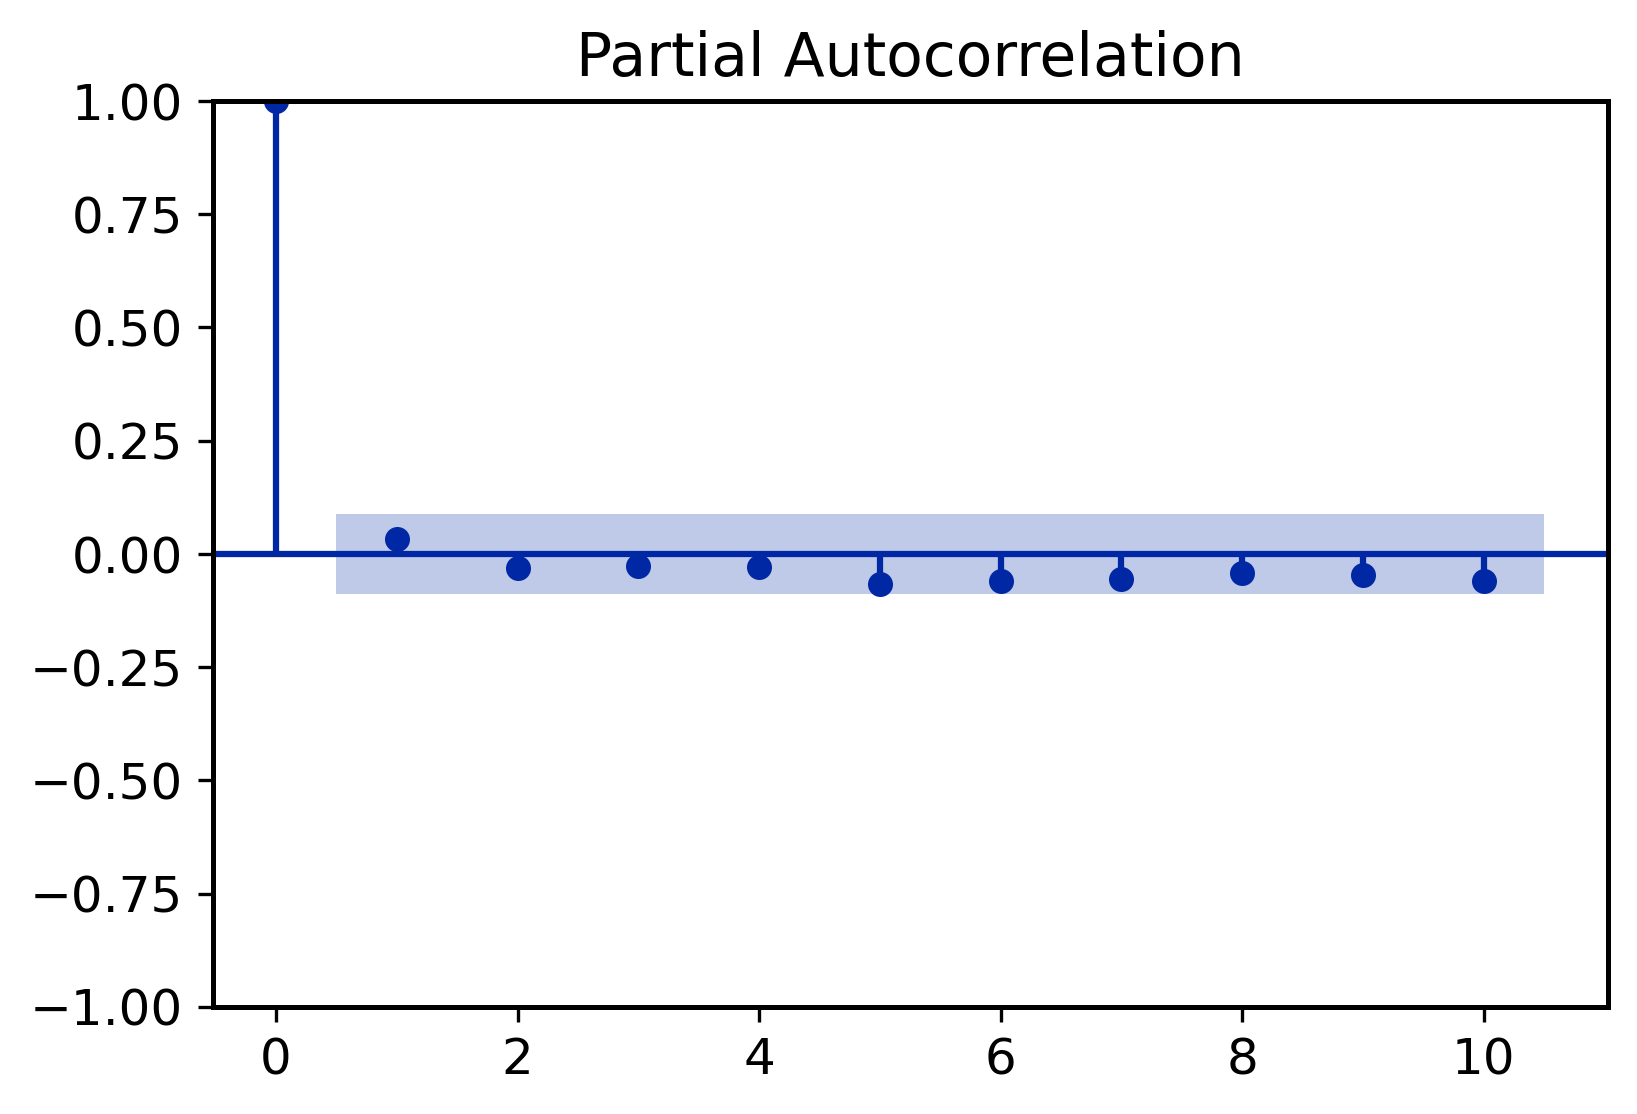

/Users/bekra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


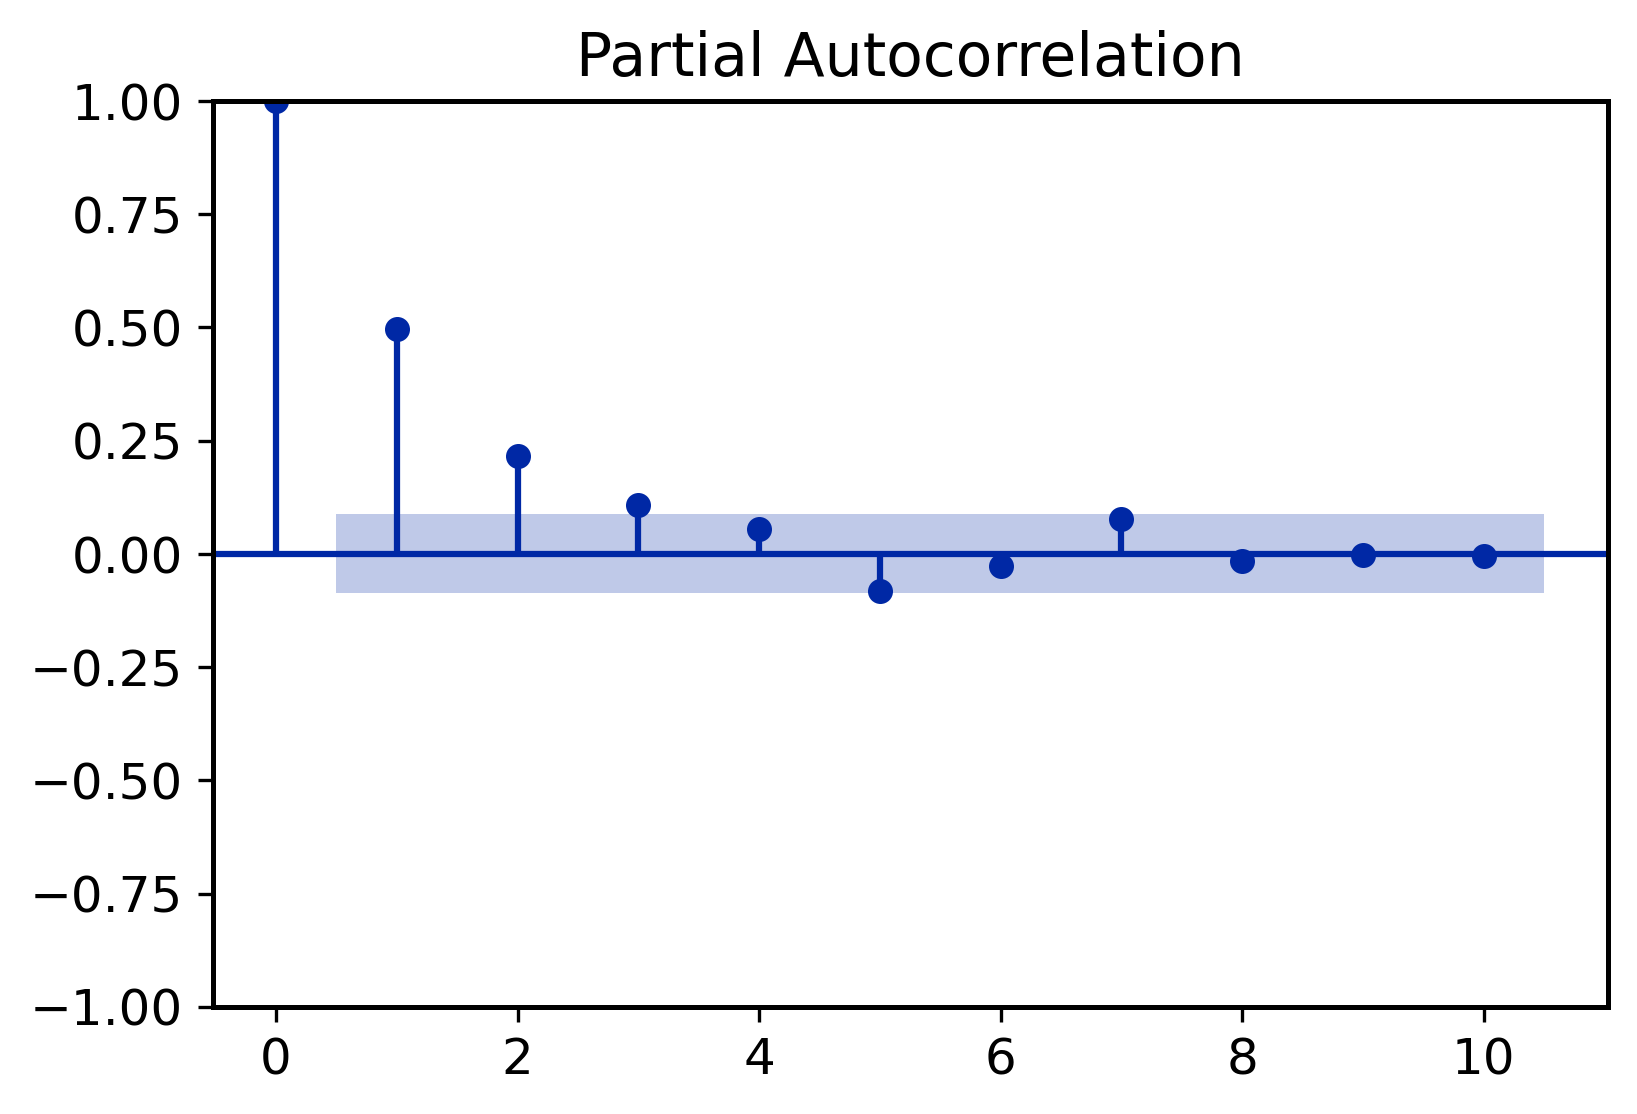

In [129]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
_df = adjusted_results.copy()
ret_diff = adjusted_results.copy()
ret_diff['daily']=_df['daily']-1

for col in tokens:
    ret_diff[col] =  ret_diff[ret_diff[col].notna()][col]-ret_diff['daily_accrued']
    plot_pacf(ret_diff[col].dropna(), lags=10)
    plt.show()


/Users/bekra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


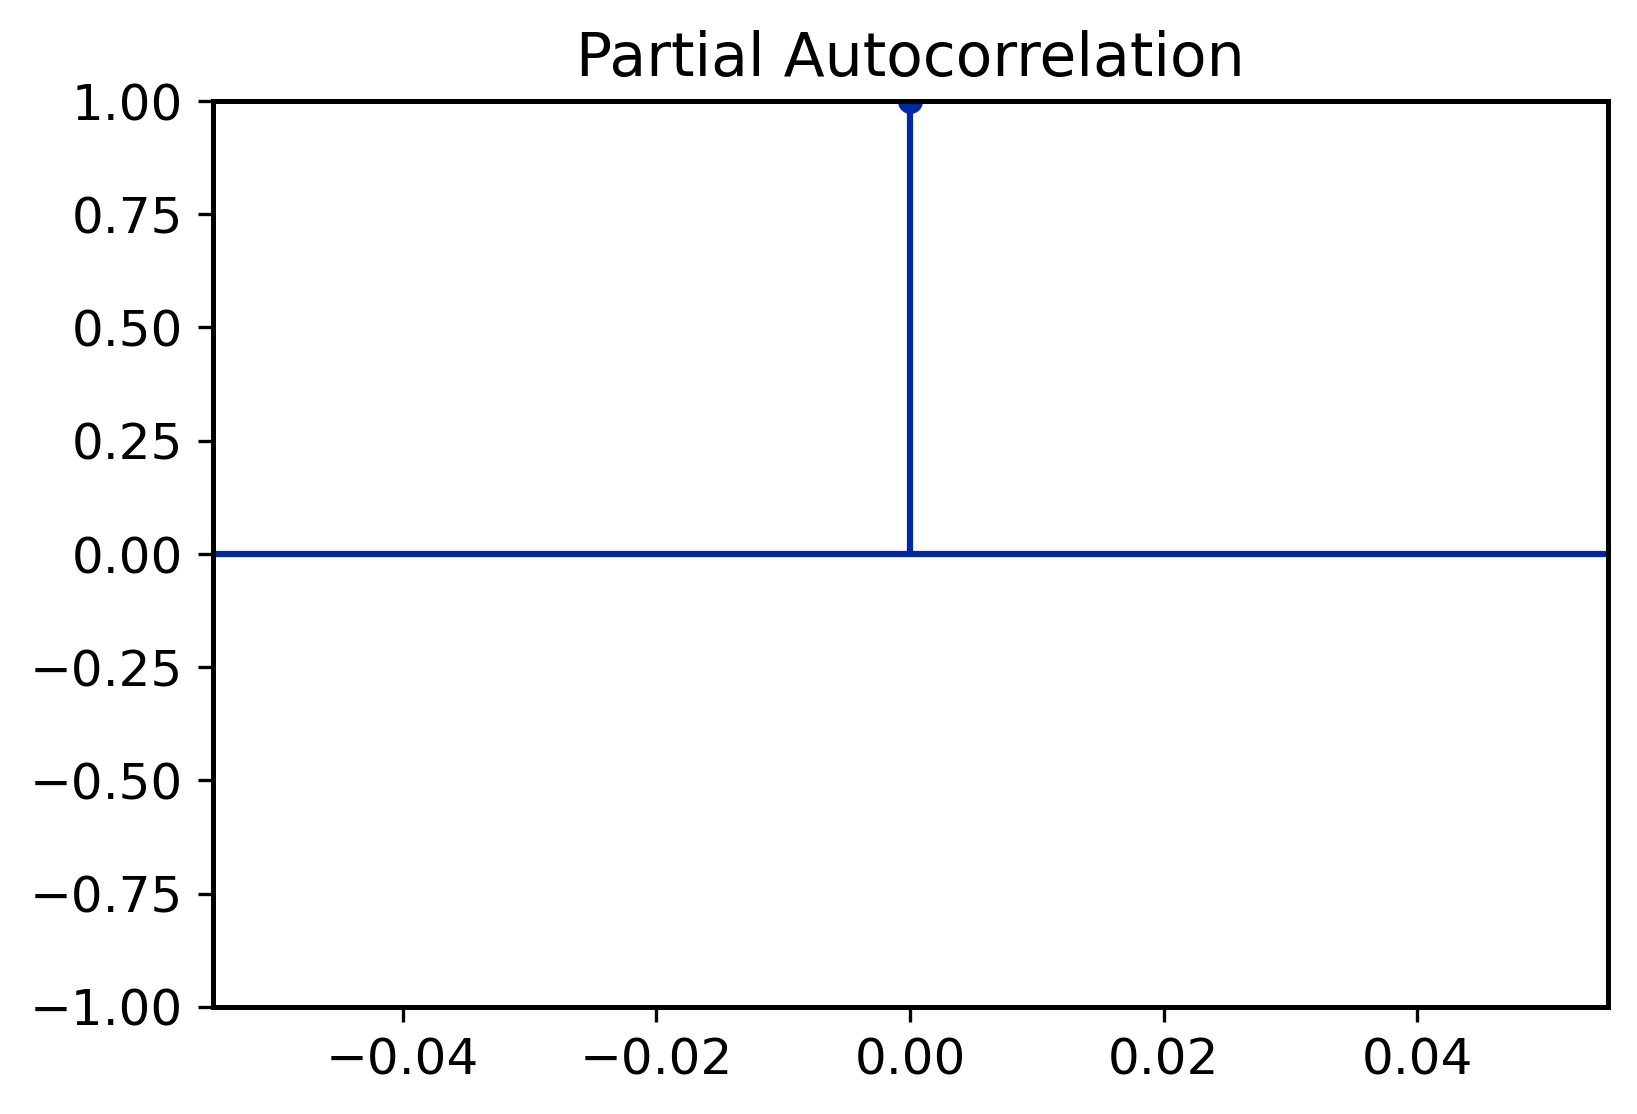

In [131]:
plot_pacf(ret_diff['jSOL'], lags=10)
plt.show()


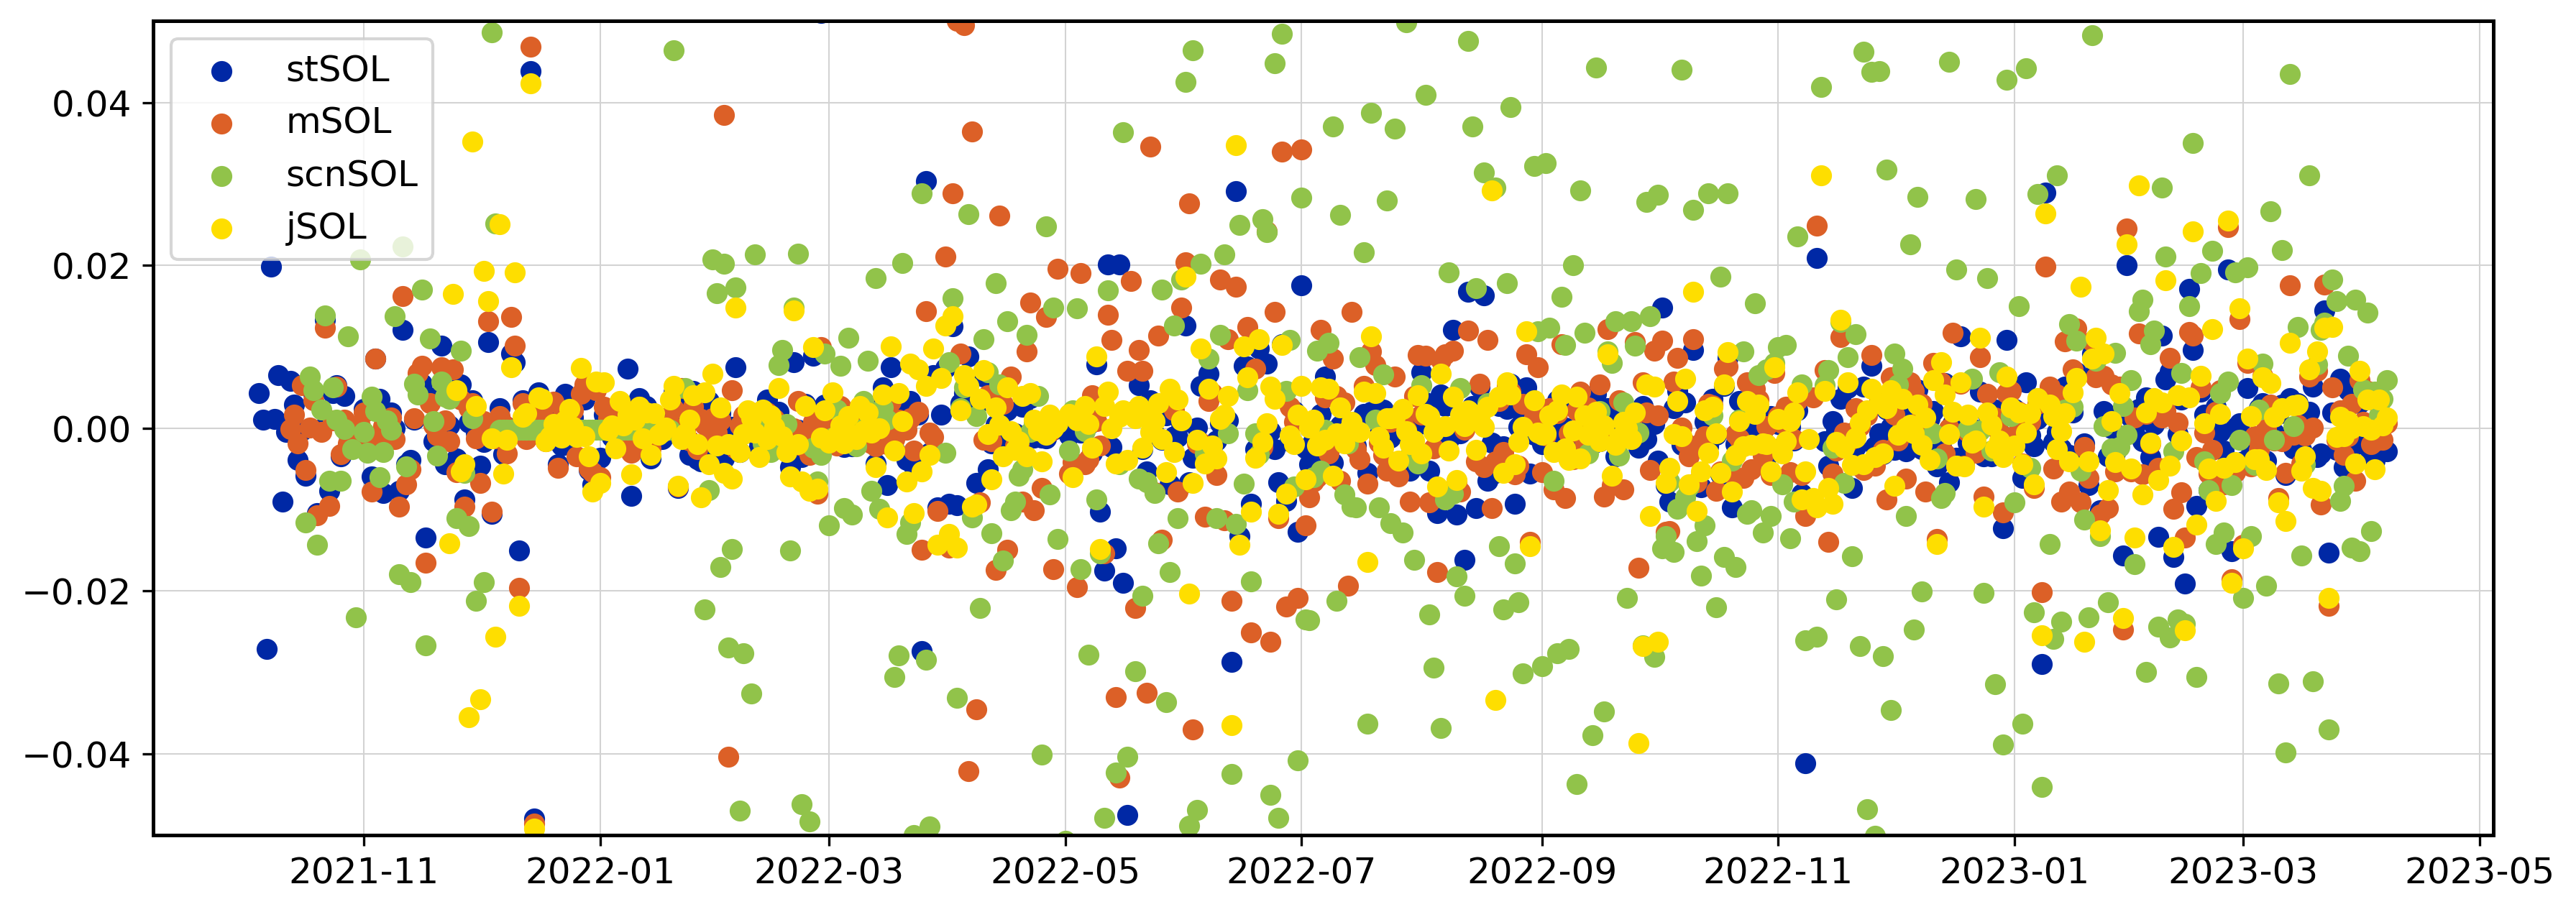

In [132]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = excess_returns
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.scatter(data_to_plot[col].index, data_to_plot[col], lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.set_ylim(-0.05,0.05)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

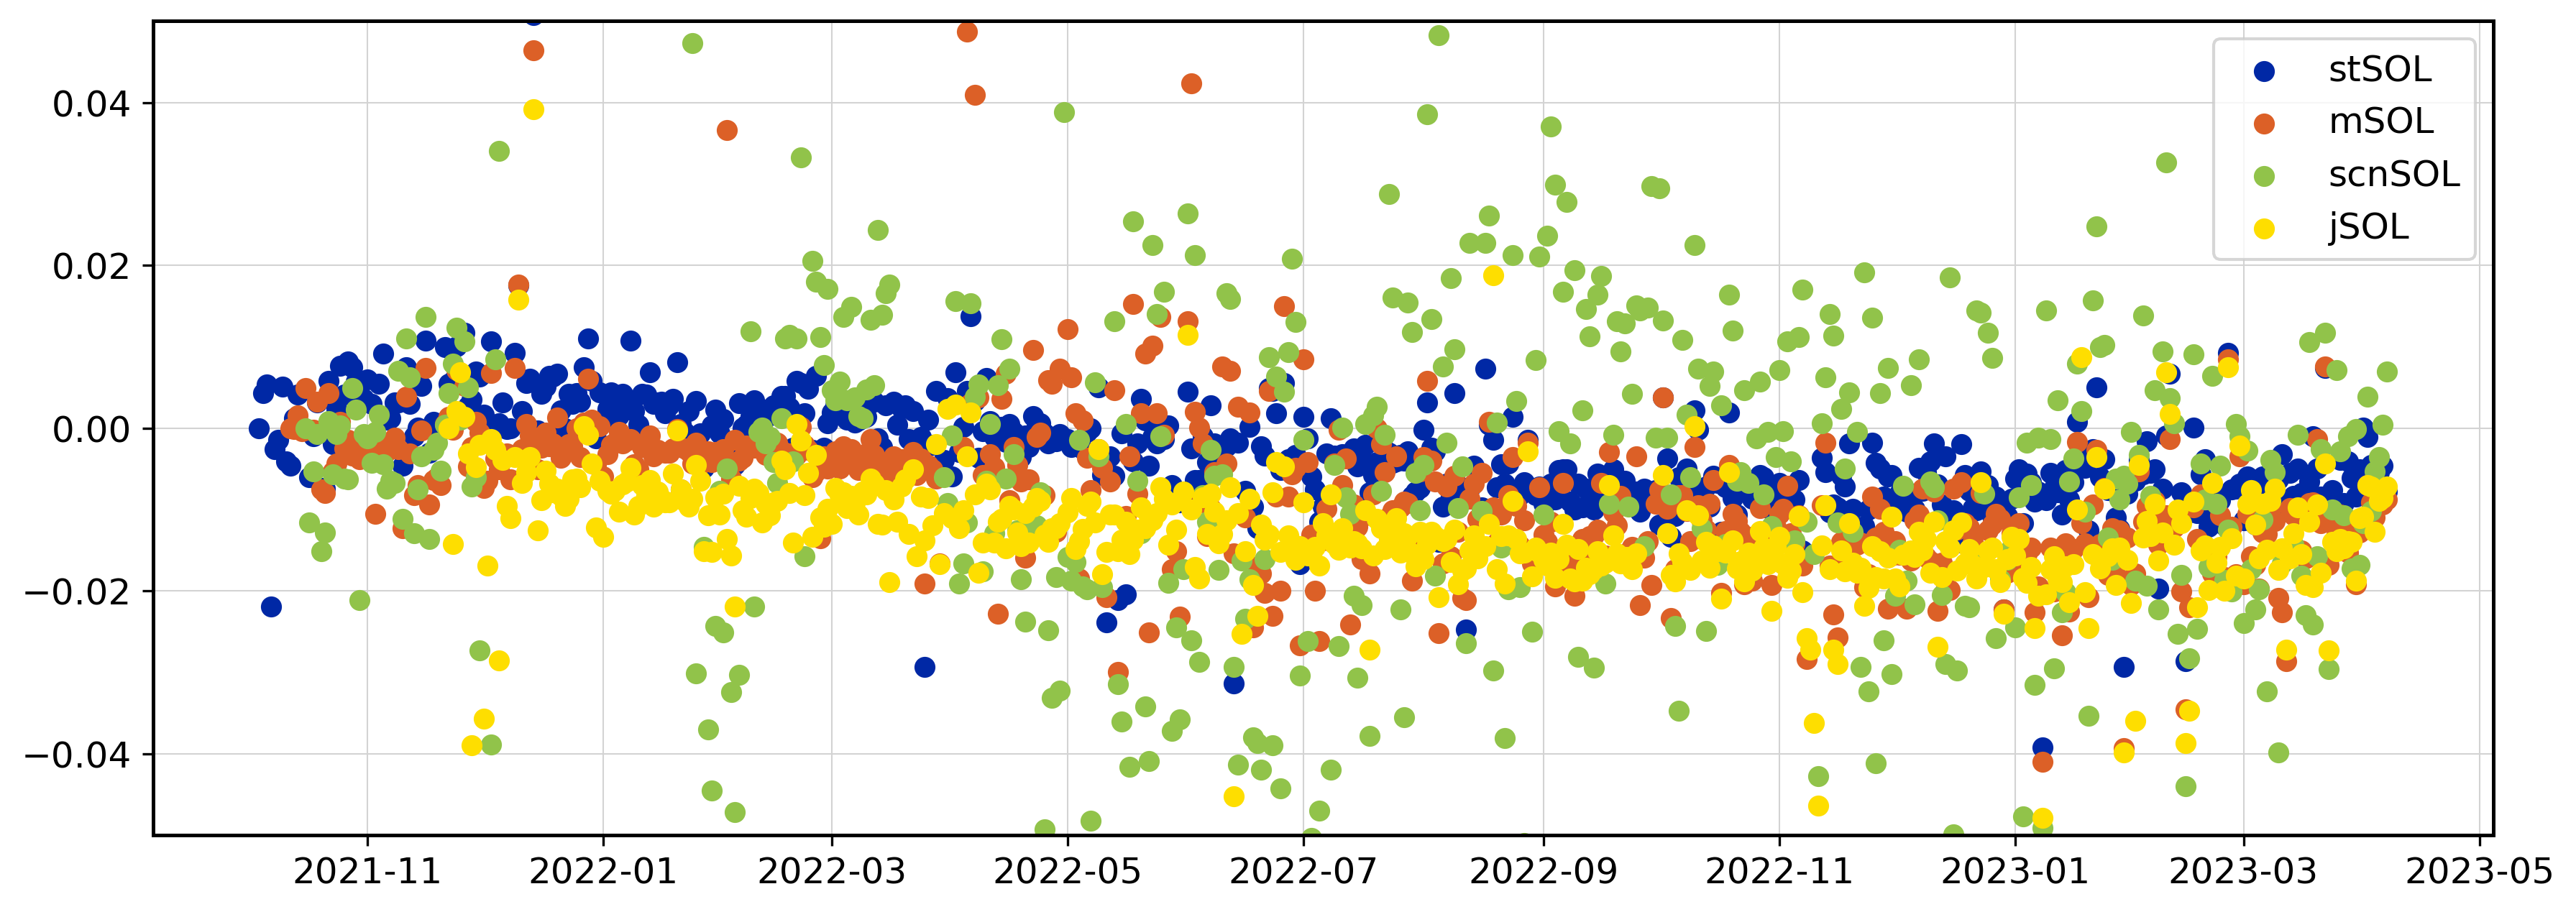

In [133]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = ret_diff
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.scatter(data_to_plot[col].index, data_to_plot[col], lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.set_ylim(-0.05,0.05)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [134]:
excess_returns.describe()

stSOL        mSOL      scnSOL        jSOL       daily  \
count  550.000000  542.000000  538.000000  501.000000  551.000000   
mean     0.000048    0.000081    0.004807    0.000047    0.000185   
std      0.011073    0.013819    0.146199    0.011031    0.000000   
min     -0.096113   -0.078521   -0.710332   -0.061471    0.000185   
25%     -0.002791   -0.004649   -0.013181   -0.003528    0.000185   
50%      0.000087    0.000085   -0.000185    0.000081    0.000185   
75%      0.002721    0.004262    0.011931    0.003534    0.000185   
max      0.082366    0.071243    3.235801    0.108328    0.000185   

       daily_accrued  
count     551.000000  
mean        1.052950  
std         0.031071  
min         1.000185  
25%         1.026006  
50%         1.052492  
75%         1.079663  
max         1.107535

/var/folders/4r/y8rtkym13fx1wcrtctrv0pp80000gn/T/ipykernel_58469/2208906254.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


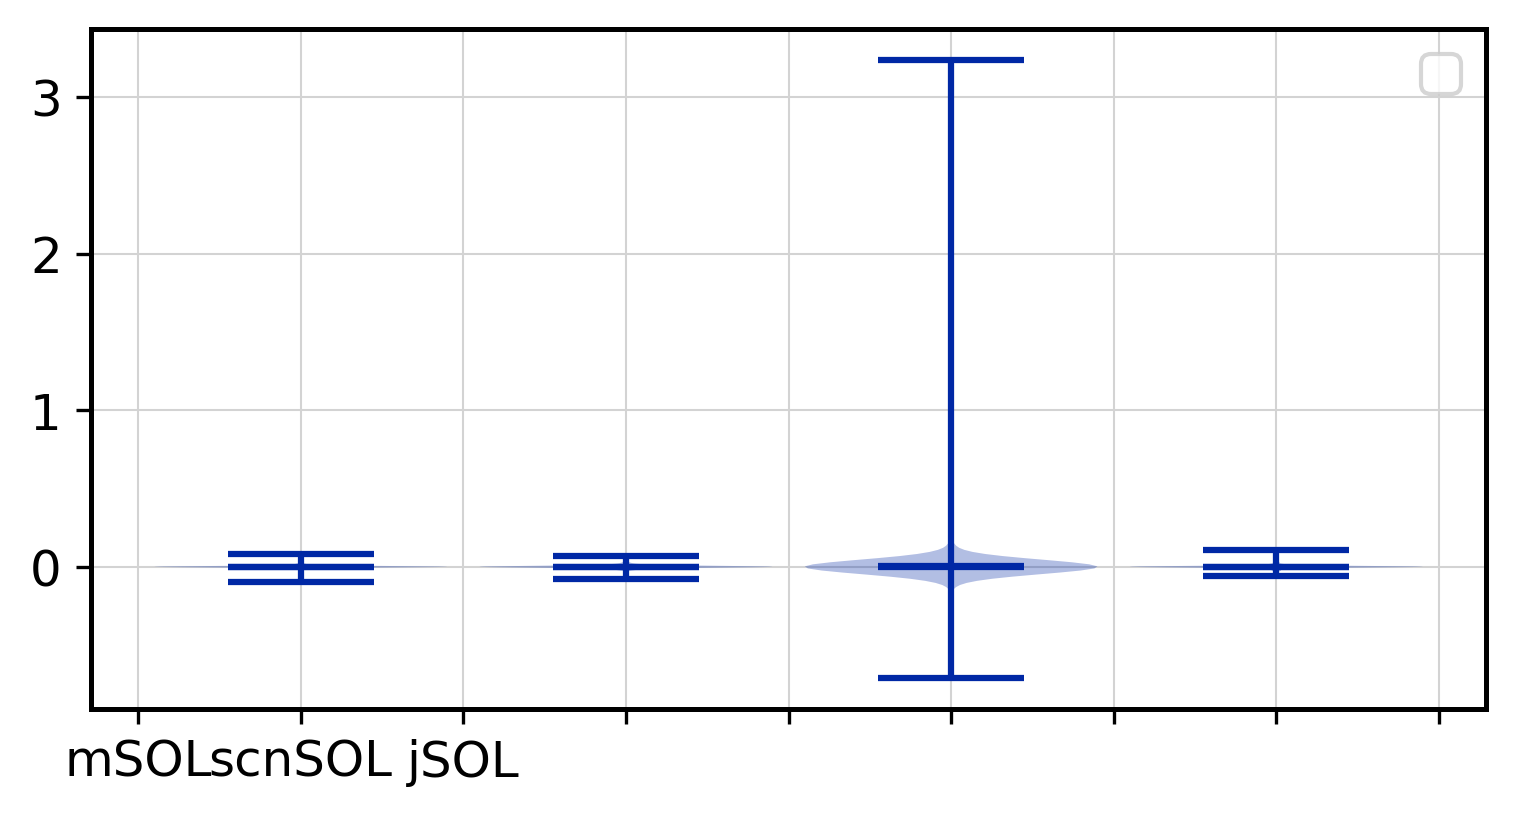

In [135]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = excess_returns
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,3),dpi =300)

violin = []
labels = []
for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    violin.append(data_to_plot[data_to_plot[col].notna()][col].values)
    labels.append(col)

vplot = ax.violinplot(violin, positions=None, widths=0.9, showmeans=True, showextrema=True, showmedians=True, points=300, bw_method=None)
ax.set_xticklabels(labels)
#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
#ax.set_ylim(-0.05,0.05)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

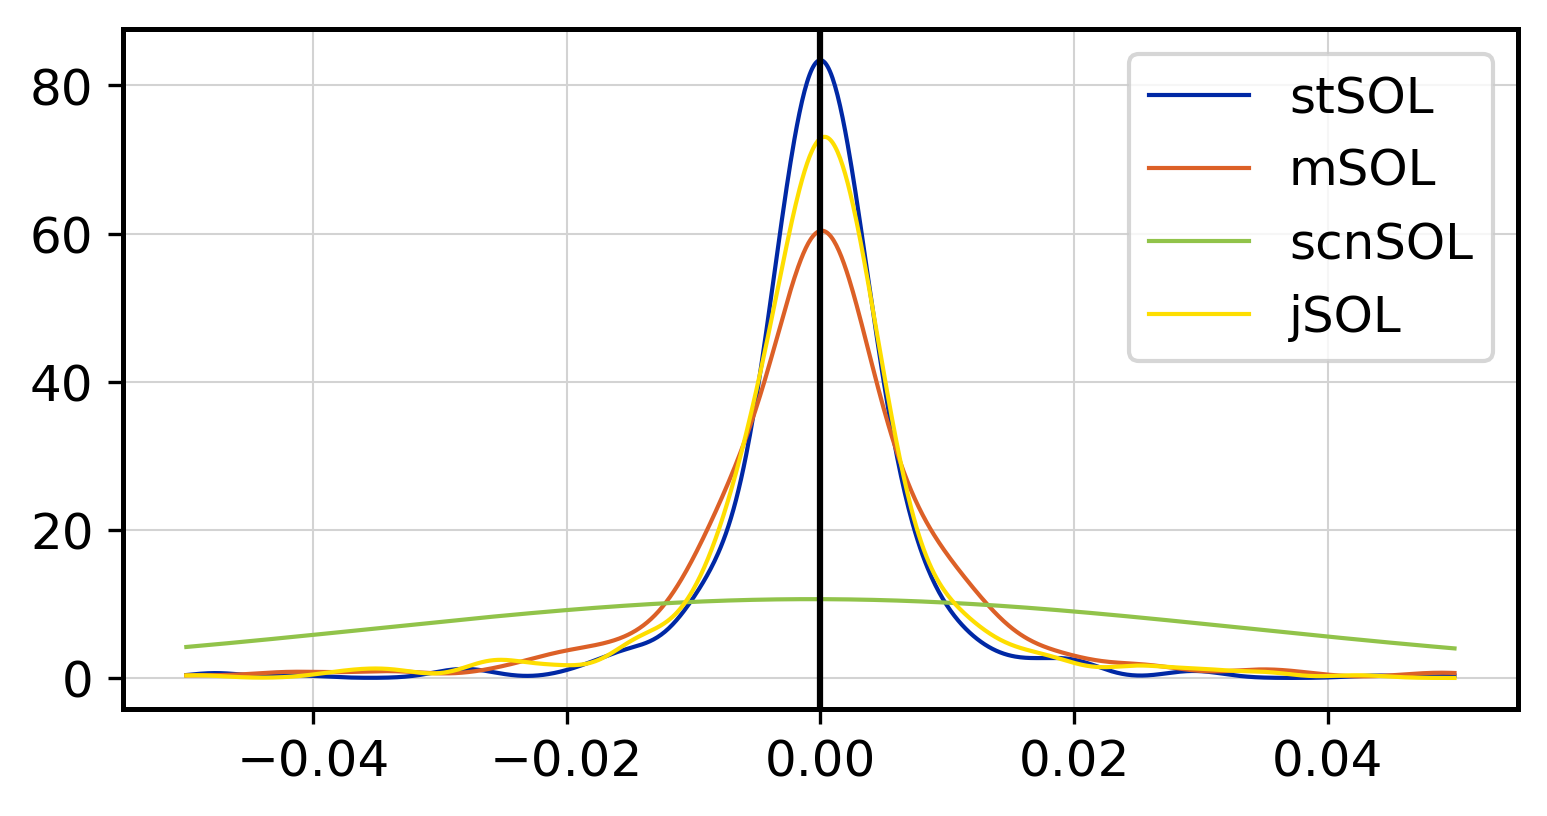

In [136]:
from scipy.stats import gaussian_kde


data_to_plot = excess_returns
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,3),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    d = data_to_plot[data_to_plot[col].notnull()][col].values
    density = gaussian_kde(d)

    density.covariance_factor = lambda : 0.2
    density._compute_covariance()
    x = np.linspace(-0.05,0.05,1000)
    
    line = ax.plot(x,density(x),lw=1, label=col)
    #ax.fill_between(x,0,density(x), alpha = 0.1, color = line[0].get_color())

ax.axvline(0, color='k')
ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

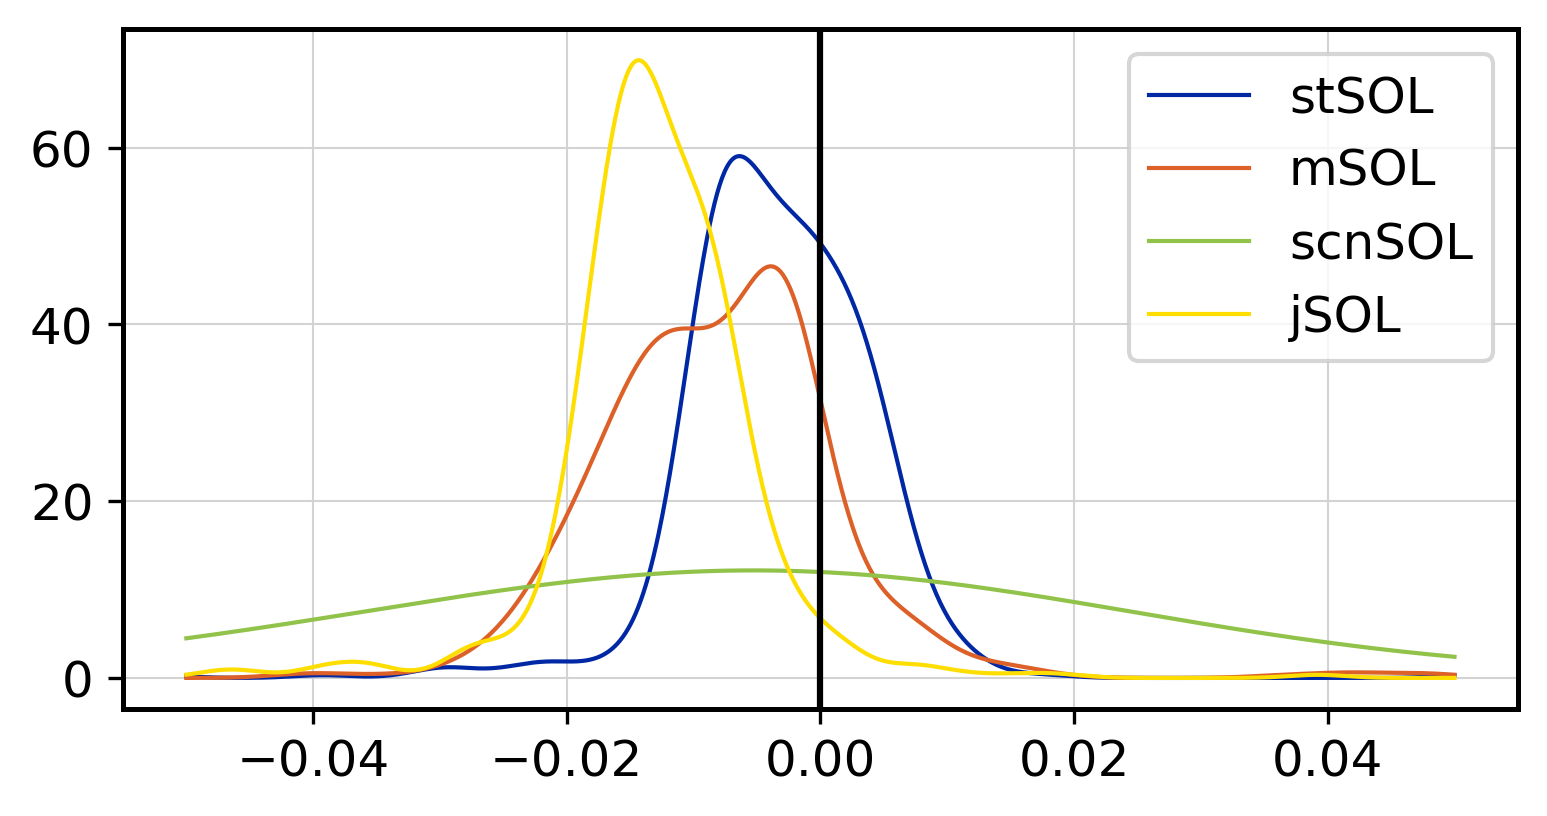

In [138]:
from scipy.stats import gaussian_kde


data_to_plot = ret_diff
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,3),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    d = data_to_plot[data_to_plot[col].notnull()][col].values
    density = gaussian_kde(d)

    density.covariance_factor = lambda : 0.2
    density._compute_covariance()
    x = np.linspace(-0.05,0.05,1000)
    
    line = ax.plot(x,density(x),lw=1, label=col)
    #ax.fill_between(x,0,density(x), alpha = 0.1, color = line[0].get_color())

ax.axvline(0, color='k')
ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

NameError: name 'effective' is not defined

In [140]:
data_reg = pd.concat([excess_returns, interest.daily_eth_change, interest.monthly_ETH_std, np.log(interest.market_cap), np.log(interest.volume)], axis=1, join="inner")
#for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
#    data_reg[col] = adjusted_results[col].pct_change(1)
data_reg

AttributeError: 'DataFrame' object has no attribute 'daily_eth_change'

In [ ]:
data_auto_reg = pd.concat([ret_diff, interest.daily_eth_change, interest.monthly_ETH_std, np.log(interest.market_cap), np.log(interest.volume)], axis=1, join="inner")
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    data_auto_reg['shift1_'+str(col)] = data_auto_reg[col].shift(1)
    data_auto_reg['shift2_'+str(col)] = data_auto_reg[col].shift(2)
    data_auto_reg['shift3_'+str(col)] = data_auto_reg[col].shift(3)
    data_auto_reg['shift4_'+str(col)] = data_auto_reg[col].shift(4)
    data_auto_reg['shift5_'+str(col)] = data_auto_reg[col].shift(5)
    data_auto_reg['shift6_'+str(col)] = data_auto_reg[col].shift(6)
data_auto_reg

wstETH      rETH     cbETH   sfrxETH   ankrETH     daily  \
Date                                                                     
2021-10-07  0.000000       NaN       NaN       NaN       NaN  0.000151   
2021-10-08 -0.005052       NaN       NaN       NaN       NaN  0.000152   
2021-10-09 -0.004301       NaN       NaN       NaN       NaN  0.000151   
2021-10-10  0.007464       NaN       NaN       NaN       NaN  0.000150   
2021-10-11 -0.017937       NaN       NaN       NaN       NaN  0.000151   
...              ...       ...       ...       ...       ...       ...   
2023-04-03 -0.013960 -0.011445  0.026556  0.004102  0.079862  0.000130   
2023-04-04 -0.008914 -0.006358  0.027723  0.005017  0.086376  0.000125   
2023-04-05 -0.014489 -0.016741  0.026513  0.004014  0.074990  0.000119   
2023-04-06 -0.010816 -0.015037  0.027735  0.004129  0.087382  0.000119   
2023-04-07 -0.008614 -0.004170  0.032371  0.014264  0.095329  0.000118   

            daily_accrued  daily_eth_change  monthly_ETH_std  market_cap  ...  \
Date                                                                      ...   
2021-10-07       1.000151          0.002070         0.050385   26.771961  ...   
2021-10-08       1.000303         -0.006749         0.050297   26.772080  ...   
2021-10-09       1.000454          0.003355         0.050128   26.763326  ...   
2021-10-10       1.000604         -0.041912         0.049318   26.767883  ...   
2021-10-11       1.000756          0.034882         0.049584   26.726573  ...   
...                   ...               ...              ...         ...  ...   
2023-04-03       1.076567          0.008124         0.032198   26.100830  ...   
2023-04-04       1.076701          0.033535         0.032575   26.110048  ...   
2023-04-05       1.076829          0.020368         0.032659   26.140512  ...   
2023-04-06       1.076957         -0.018957         0.032953   26.162953  ...   
2023-04-07       1.077084         -0.003890         0.032694   26.141806  ...   

            shift3_sfrxETH  shift4_sfrxETH  shift5_sfrxETH  shift6_sfrxETH  \
Date                                                                         
2021-10-07             NaN             NaN             NaN             NaN   
2021-10-08             NaN             NaN             NaN             NaN   
2021-10-09             NaN             NaN             NaN             NaN   
2021-10-10             NaN             NaN             NaN             NaN   
2021-10-11             NaN             NaN             NaN             NaN   
...                    ...             ...             ...             ...   
2023-04-03        0.007791        0.013131        0.006059        0.006006   
2023-04-04        0.004907        0.007791        0.013131        0.006059   
2023-04-05        0.003477        0.004907        0.007791        0.013131   
2023-04-06        0.004102        0.003477        0.004907        0.007791   
2023-04-07        0.005017        0.004102        0.003477        0.004907   

            shift1_ankrETH  shift2_ankrETH  shift3_ankrETH  shift4_ankrETH  \
Date                                                                         
2021-10-07             NaN             NaN             NaN             NaN   
2021-10-08             NaN             NaN             NaN             NaN   
2021-10-09             NaN             NaN             NaN             NaN   
2021-10-10             NaN             NaN             NaN             NaN   
2021-10-11             NaN             NaN             NaN             NaN   
...                    ...             ...             ...             ...   
2023-04-03        0.084370        0.084231        0.086058        0.087489   
2023-04-04        0.079862        0.084370        0.084231        0.086058   
2023-04-05        0.086376        0.079862        0.084370        0.084231   
2023-04-06        0.074990        0.086376        0.079862        0.084370   
2023-04-07        0.087382        0.074990    

In [ ]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    df_reg = data_reg[['daily_eth_change', 'monthly_ETH_std', 'market_cap', 'volume' ,str(col), 'daily' ]].dropna()
    X = df_reg[['daily_eth_change', 'monthly_ETH_std', 'market_cap', 'volume', 'daily']]
    y = df_reg[str(col)]
    X = sm.add_constant(X)
    model_ols = sm.OLS(y,X)
    ols_res = model_ols.fit() 
    print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 wstETH   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2915
Date:                Sat, 13 May 2023   Prob (F-statistic):              0.918
Time:                        12:19:01   Log-Likelihood:                 2032.7
No. Observations:                 547   AIC:                            -4053.
Df Residuals:                     541   BIC:                            -4027.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0105      0.016  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

In [43]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    df_auto_reg = data_auto_reg[['daily_eth_change', 'monthly_ETH_std', 'market_cap', 'volume' ,str(col),'shift1_'+str(col),
                                 'shift2_'+str(col),'shift3_'+str(col),'shift4_'+str(col),'shift5_'+str(col),'shift6_'+str(col),'daily' ]].dropna()
    X = df_auto_reg[['shift1_'+str(col),'shift2_'+str(col),'shift3_'+str(col),'shift4_'+str(col),'shift5_'+str(col),'shift6_'+str(col),'daily_eth_change', 'monthly_ETH_std', 'market_cap', 'volume', 'daily']]
    y = df_auto_reg[str(col)]
    X = sm.add_constant(X)
    model_ols = sm.OLS(y,X)
    ols_res = model_ols.fit() 
    print(ols_res.summary())

ModuleNotFoundError: No module named 'linearmodels'